<center><h1 style='color: #B03A2E; font-size: 50px'>Machine Learning</h1>
<h2 style='color: #B03A2E; font-size: 20px'>Newland: The City of the Future </h2></center>

<center><h1 style='color: #000000; font-size: 15px'>Ana Carrelha m20200631</h1>
<h1 style='color: #000000; font-size: 15px'>Inês Melo m20200624</h1>
<h1 style='color: #000000; font-size: 15px'>Inês Roque m20200644</h1>
<h1 style='color: #000000; font-size: 15px'>Tomás Gonçalves m20200584</h1><enter>

# Import libraries 

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
!pip install xgboost
import xgboost as xgb
from datetime import datetime
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import f1_score
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from matplotlib.legend_handler import HandlerLine2D
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import StackingClassifier

warnings.filterwarnings('ignore')

# Import the Data 

In [2]:
train = pd.read_excel('Train.xlsx', na_values = "?")

In [3]:
train.head()

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1
3,12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1


In [4]:
train.shape

(22400, 15)

# Data Analysis 

In [5]:
train.set_index('CITIZEN_ID', inplace = True)

In [6]:
data_original = train.iloc[:,:-1]
target_original = train.iloc[:,-1]

In [7]:
output = pd.concat([target_original.value_counts(), target_original.value_counts()/len(target_original)], axis = 1)
output.columns = ['Values', 'Percentage']
output

,Values,Percentage
0,17089,0.762902
1,5311,0.237098


# Feature Engineering

### Age

In [8]:
def to_datetime(x):
    try:
        return datetime.strptime(x, ' %B %d,%Y')
    except:
        return datetime.strptime(' March 1,'+ x.split(',')[1], ' %B %d,%Y')

data_original['Birthday'] = data_original['Birthday'].apply(to_datetime)

In [9]:
data_original.insert(2,'Age', data_original['Birthday'].map(lambda date : 2048 - date.year))

### Base Area

In [10]:
data_original['Base Area'] = data_original['Base Area'].map(lambda region: region if region == 'Northbury' 
                                                            else 'Other Base Area')

### Marital Status

In [11]:
data_original['Marital Status'] = data_original['Marital Status'].map(lambda status: 'Married' 
                                    if(status =='Married - Spouse Missing' or status == 'Married - Spouse in the Army')
                                    else('Divorced' if status == 'Separated' else status))

### Gender

In [12]:
data_original.insert(1, 'Gender', data_original['Name'].map(lambda name : 0 if name.split()[0] == 'Mr.' else 1))

### Education Level

In [13]:
education = data_original.loc[:,['Education Level']]
education_status = OrdinalEncoder(categories=[['Preschool','Primary School','Middle School - 1st Cycle',
                                               'Middle School - 2nd Cycle','Middle School Complete','High School - 1st Cycle',
                                               'High School - 2nd Cycle','High School Complete','Professional School',
                                               'High School + PostGraduation','Professional School + PostGraduation',
                                               'Bachelors','Bachelors + PostGraduation','Masters','Masters + PostGraduation',
                                               'PhD']])
data_original['Education Level'] = education_status.fit_transform(education)

### Drop features

In [14]:
data_original.drop(columns = ['Name','Birthday'], inplace = True)

# Outlier detection

### Age

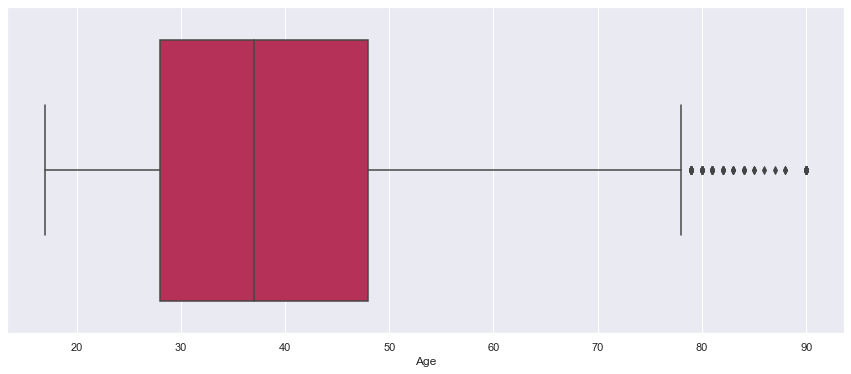

In [15]:
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15,6)})
ax = sns.boxplot(data = data_original, x = 'Age', orient = "h", palette = 'rocket')

### Years of Education

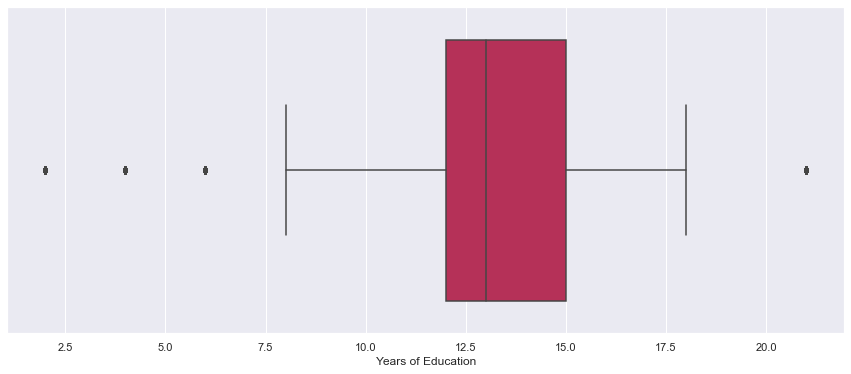

In [16]:
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15,6)})
ax = sns.boxplot(data = data_original, x = 'Years of Education', orient = "h", palette = 'rocket') 

### Working Hours per week

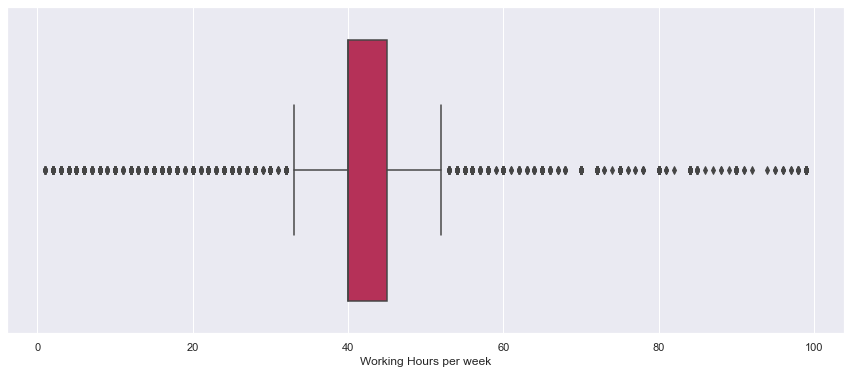

In [17]:
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15,6)})
ax = sns.boxplot(data = data_original, x = 'Working Hours per week', orient = "h", palette = 'rocket')

### Money Received

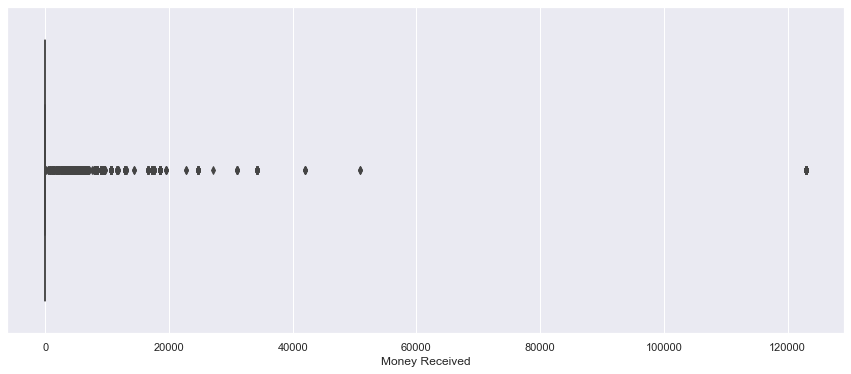

In [18]:
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15,6)})
ax = sns.boxplot(data = data_original, x = 'Money Received', orient = "h", palette = 'rocket') 

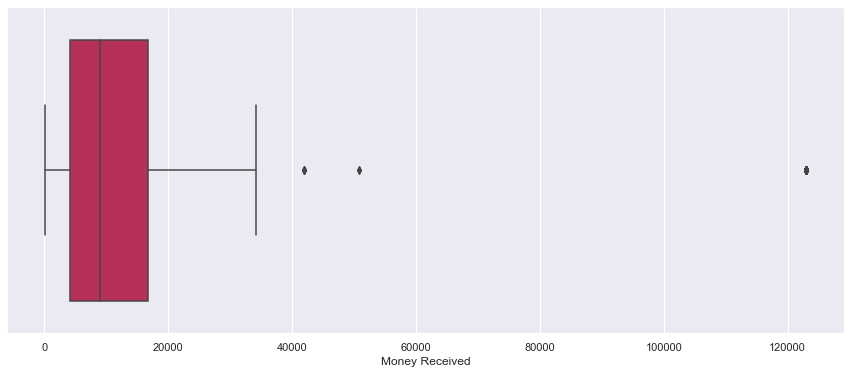

In [19]:
data_money = data_original[data_original["Money Received"] > 0]
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15,6)})
ax = sns.boxplot(data = data_money, x = 'Money Received', orient = "h", palette = 'rocket') 

### Ticket Price

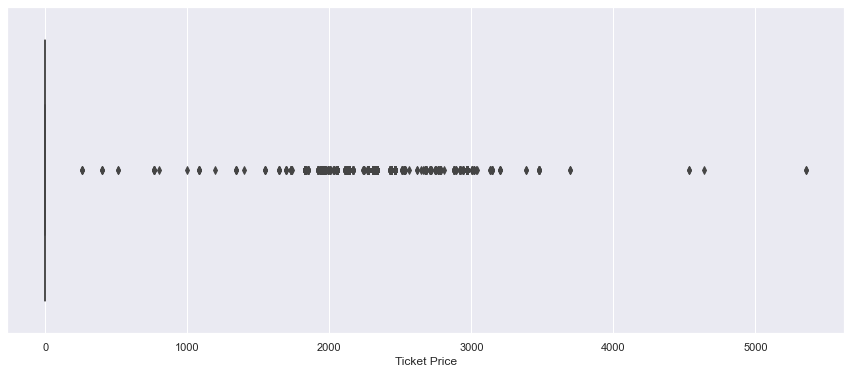

In [20]:
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15,6)})
ax = sns.boxplot(data = data_original, x = 'Ticket Price', orient = "h", palette = 'rocket')

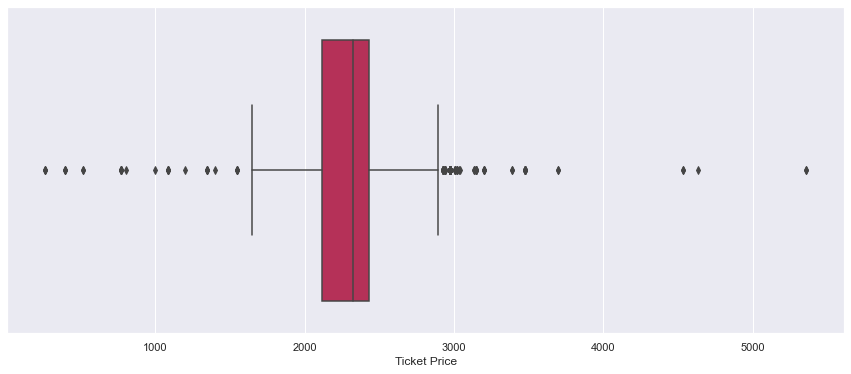

In [21]:
data_ticket = data_original[data_original["Ticket Price"] > 0]
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15,6)})
ax = sns.boxplot(data = data_ticket, x = 'Ticket Price', orient = "h", palette = 'rocket') 

### Outliers removal

In [22]:
filters = ((data_original['Age'] > 85) | (data_original['Years of Education'] < 5)| 
            ((data_original['Working Hours per week'] < 10) | (data_original['Working Hours per week'] > 90)) | 
            (data_original['Money Received'] > 40000) | ((data_original['Ticket Price'] > 4000) | 
            (data_original['Ticket Price'][data_original['Ticket Price'] > 0] < 700)))
data = data_original[~filters].copy()
target = target_original[~filters].copy()

In [23]:
print('Percentage of data kept after removing outliers:', np.round(data.shape[0]/data_original.shape[0], 4))

Percentage of data kept after removing outliers: 0.969


### Other outlier detection methods that failed

In [24]:
metric = list(data_original.select_dtypes(include = ['integer', 'float']).columns)

#### DBSCAN

In [25]:
dbscan = DBSCAN(eps = 10, min_samples = 100, n_jobs = -1)
dbscan_labels = dbscan.fit_predict(data_original[metric])

dbscan_n_clusters = len(np.unique(dbscan_labels))
print('Number of estimated clusters : %d' % dbscan_n_clusters)
print(Counter(dbscan_labels))
print('Percentage of data kept if we remove the outliers:', len(data_original[dbscan_labels!=-1])/len(data_original))

Number of estimated clusters : 2
Counter({0: 19383, -1: 3017})
Percentage of data kept if we remove the outliers: 0.8653125


#### LocalOutlierFactor

In [26]:
outliers = LocalOutlierFactor(n_neighbors=10).fit_predict(data_original[metric])
print(Counter(outliers))
print('Percentage of data kept if we remove the outliers:', len(data_original[outliers!=-1])/len(data_original))

Counter({1: 20150, -1: 2250})
Percentage of data kept if we remove the outliers: 0.8995535714285714


# Split into train and test

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.30, stratify = target, random_state = 5)

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15193 entries, 34252 to 19122
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  15193 non-null  int64  
 1   Age                     15193 non-null  int64  
 2   Native Continent        15193 non-null  object 
 3   Marital Status          15193 non-null  object 
 4   Lives with              15193 non-null  object 
 5   Base Area               15193 non-null  object 
 6   Education Level         15193 non-null  float64
 7   Years of Education      15193 non-null  int64  
 8   Employment Sector       14389 non-null  object 
 9   Role                    14385 non-null  object 
 10  Working Hours per week  15193 non-null  int64  
 11  Money Received          15193 non-null  int64  
 12  Ticket Price            15193 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 1.6+ MB


# Imputing the missing values with the mode

In [29]:
pd.concat([pd.DataFrame(X_train.isna().sum(), columns = ['X_train']), 
           pd.DataFrame(X_test.isna().sum(), columns = ['X_test'])], axis = 1)

,X_train,X_test
Gender,0,0
Age,0,0
Native Continent,0,0
Marital Status,0,0
Lives with,0,0
Base Area,0,0
Education Level,0,0
Years of Education,0,0
Employment Sector,804,320
Role,808,322


In [30]:
X_train = X_train.fillna(X_train.mode().loc[0])

In [31]:
X_test = X_test.fillna(X_test.mode().loc[0])

# Creation of dummies variables

In [32]:
columns = ['Native Continent', 'Lives with', 'Base Area', 'Employment Sector', 'Role', 'Marital Status']
for column in columns:
    X_train = pd.concat([X_train, pd.get_dummies(X_train[str(column)])],axis=1).drop(str(column),axis=1)
    X_test = pd.concat([X_test, pd.get_dummies(X_test[str(column)])],axis=1).drop(str(column),axis=1)
if len(X_train.columns) > len(X_test.columns):
    missing_cols = set(X_train.columns) - set(X_test.columns)
    for missing in missing_cols:
        X_test[str(missing)] = 0
elif len(X_train.columns) < len(X_test.columns):
    missing_cols = set(X_test.columns) - set(X_train.columns)
    for missing in missing_cols:
        X_train[str(missing)] = 0

# Feature Scaling 

In [33]:
scaler = MinMaxScaler()

In [34]:
scaled_train_feat = scaler.fit_transform(X_train)
X_train[X_train.columns] = scaled_train_feat

In [35]:
scaled_test_feat = scaler.transform(X_test)
X_test[X_test.columns] = scaled_test_feat

# Correlation Analysis

### X_train

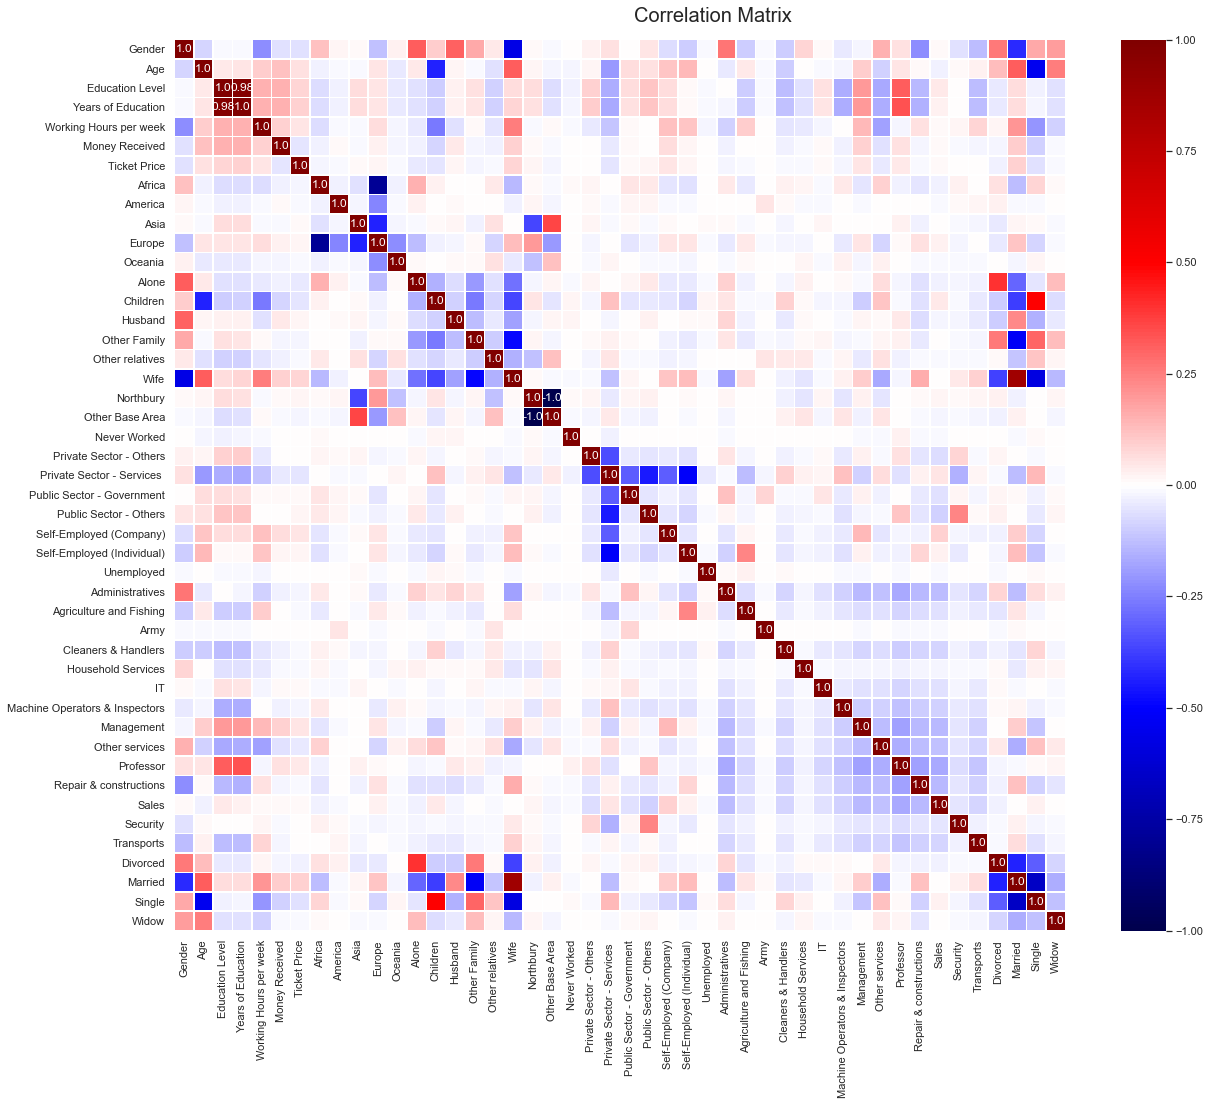

In [36]:
fig = plt.figure(figsize = (20, 15))
corr = np.round(X_train.corr(), decimals = 2)
mask_annot = np.absolute(corr.values) >= 0.9
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))
sns.heatmap(data = corr, annot = annot, cmap = plt.cm.seismic, fmt = 's', vmin = -1, vmax = 1, center = 0, square = True, 
            linewidths = 0.5)
fig.subplots_adjust(top = 0.95)
fig.suptitle("Correlation Matrix", fontsize = 20)
plt.show()

### X_test

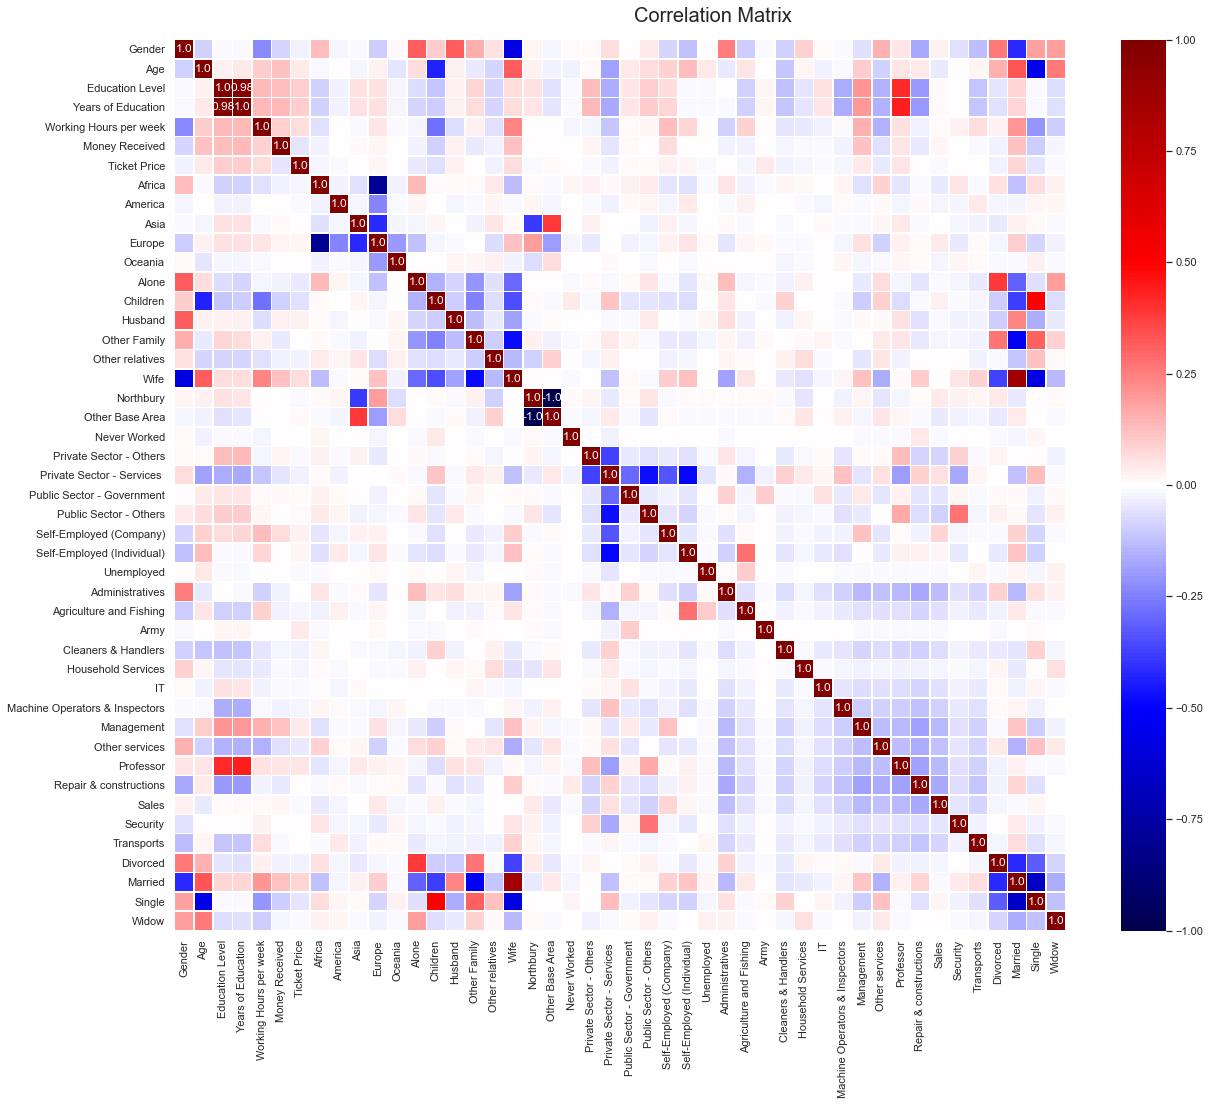

In [37]:
fig = plt.figure(figsize = (20, 15))
corr = np.round(X_test.corr(), decimals = 2)
mask_annot = np.absolute(corr.values) >= 0.9
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))
sns.heatmap(data = corr, annot = annot, cmap = plt.cm.seismic, fmt = 's', vmin = -1, vmax = 1, center = 0, square = True, 
            linewidths = 0.5)
fig.subplots_adjust(top = 0.95)
fig.suptitle("Correlation Matrix", fontsize = 20)
plt.show()

### Dropping the high correlated features

In [38]:
X_train.drop(columns = ["Education Level","Other Base Area"],inplace = True)
X_test.drop(columns = ["Education Level","Other Base Area"],inplace = True)

# Feature Selection

## Decision Tree

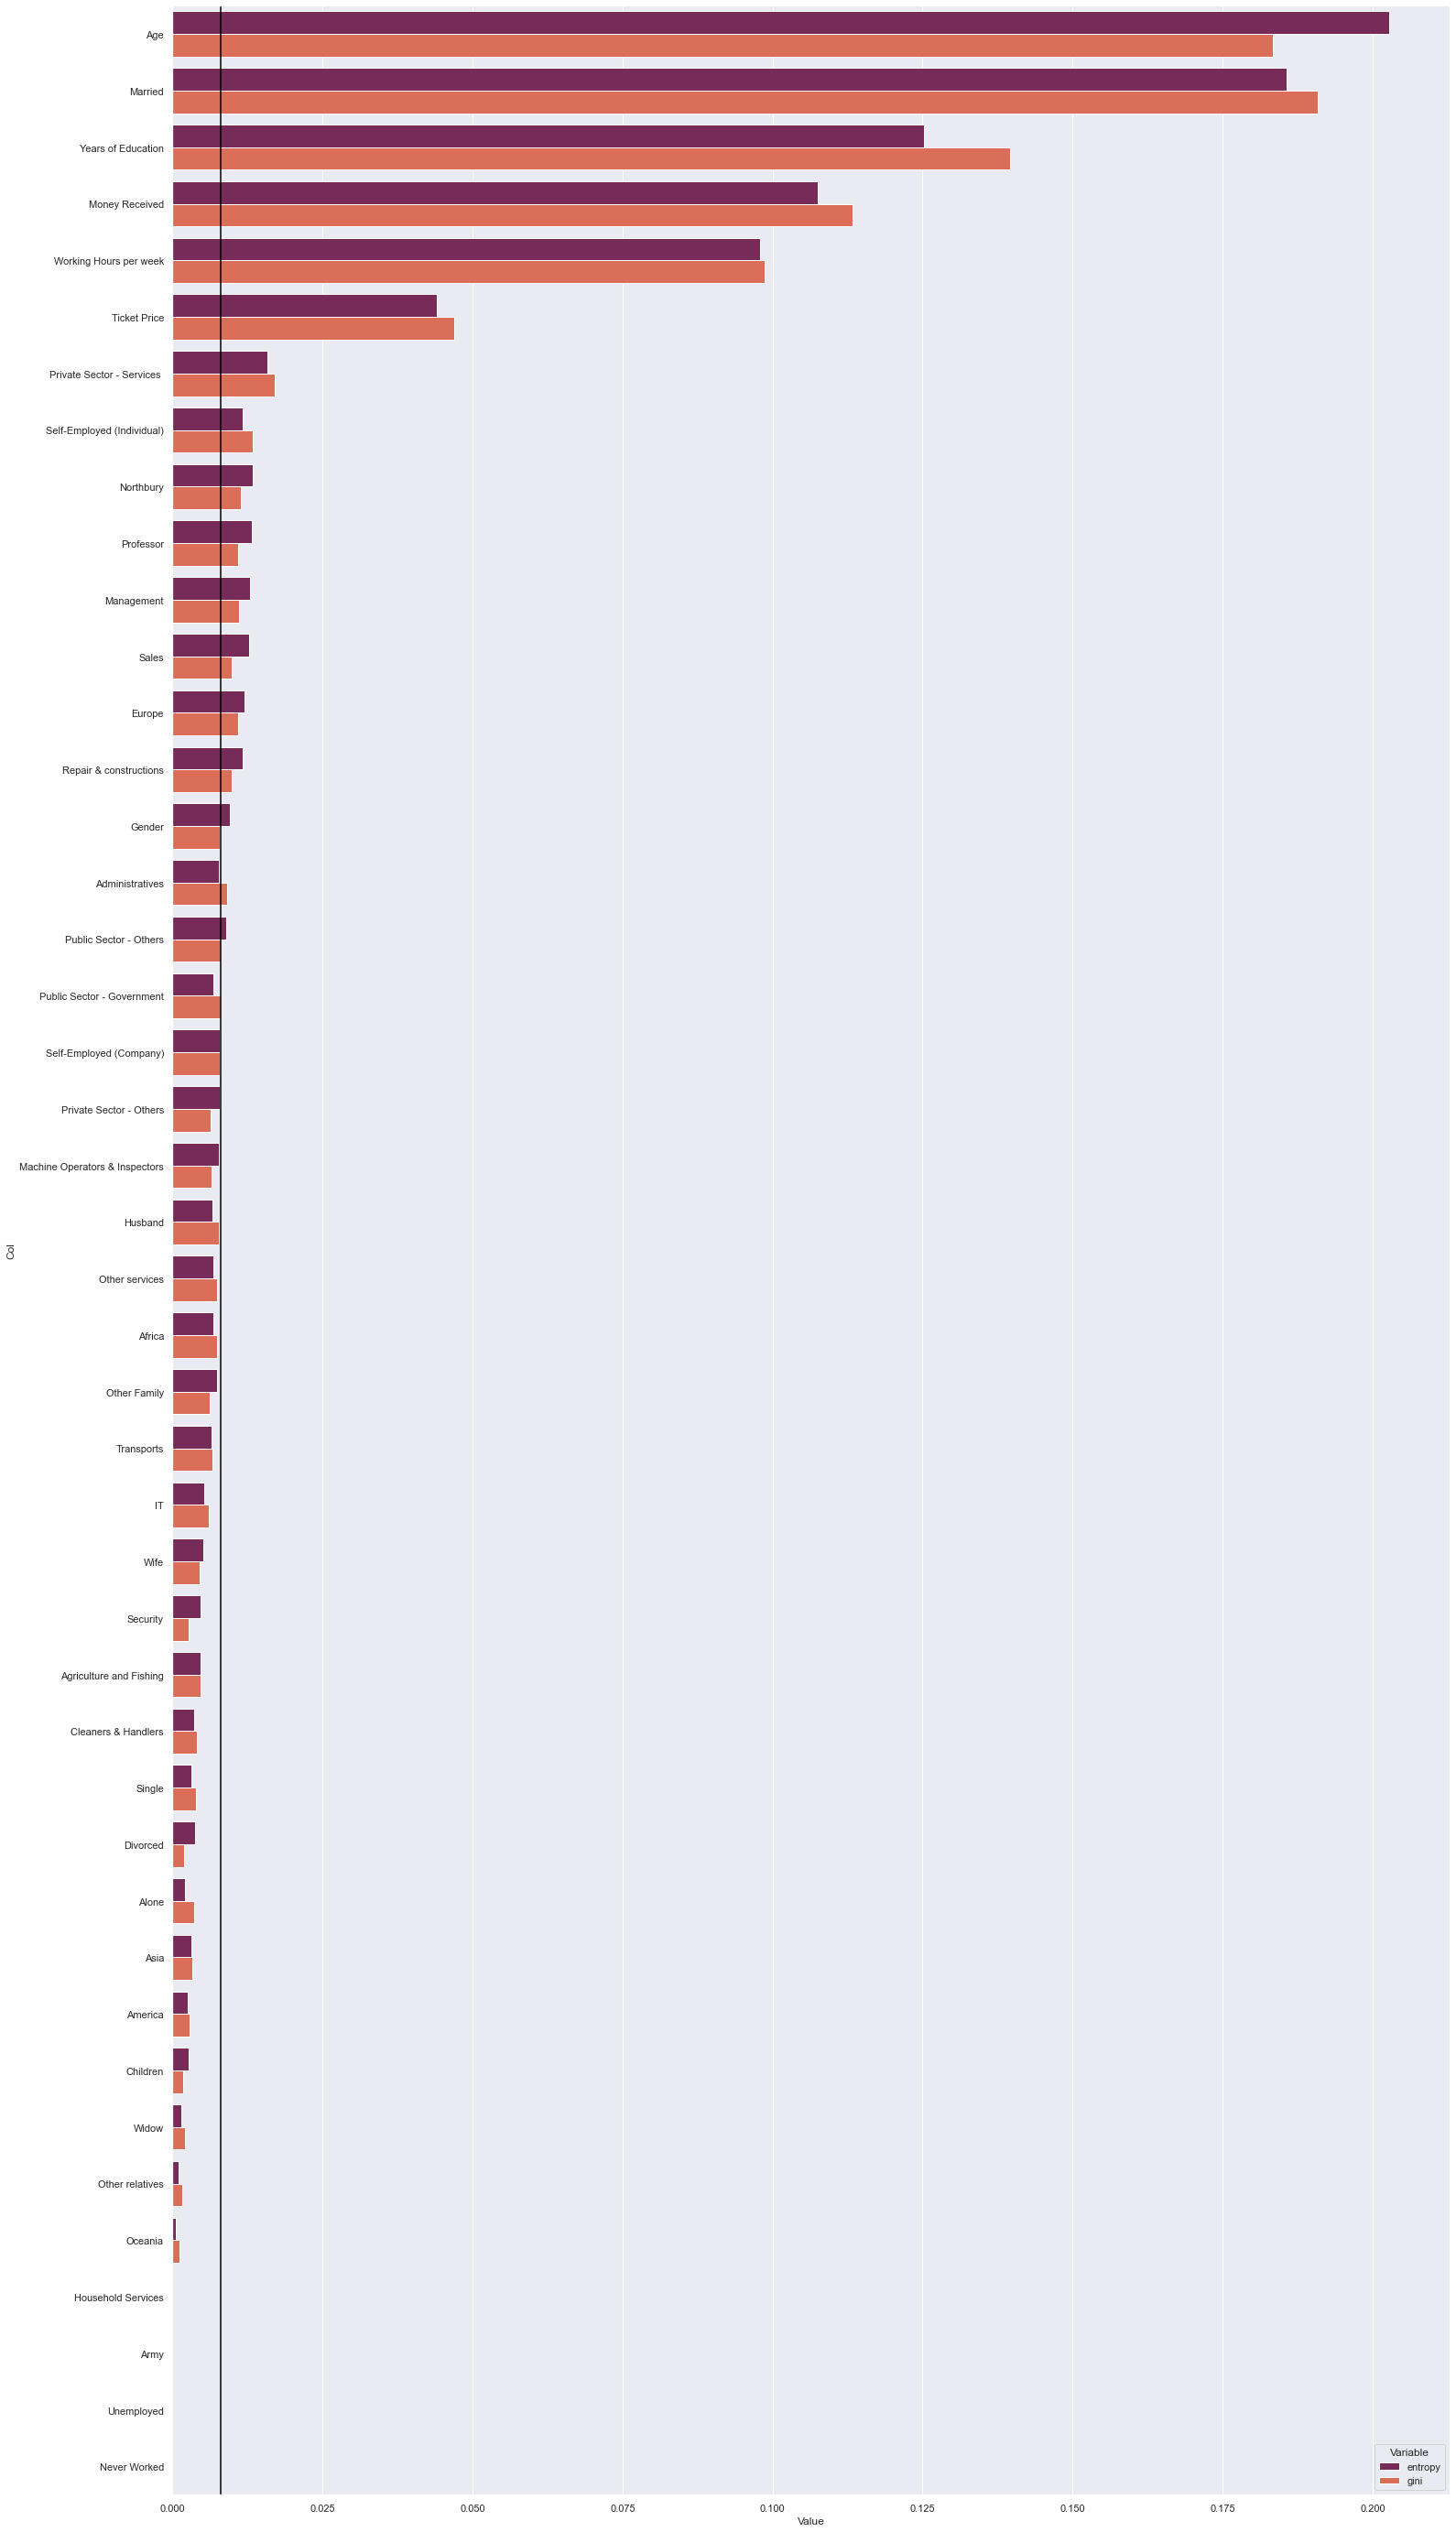

In [39]:
gini_importance = DecisionTreeClassifier(random_state = 5).fit(X_train, y_train).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion ='entropy', random_state = 5).fit(X_train, y_train).feature_importances_

zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars ='col').rename(columns = str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)
plt.figure(figsize = (25,50))
sns.barplot(y ='Col', x ='Value', hue ='Variable', data = tidy, palette = 'rocket') 
plt.axvline(x = 0.008, ymin = 0, ymax = 10, color = "black")
plt.show()

In [40]:
tidy.sort_values(['Value'], ascending = False, inplace = True)
columns_gini = tidy[(tidy['Value'] > 0.008) & (tidy['Variable'] == 'gini')].Col.values
columns_entropy = tidy[(tidy['Value'] > 0.008 ) & (tidy['Variable'] == 'entropy')].Col.values
dt_variables = list(set(list(columns_entropy) + list(columns_gini)))
print(dt_variables)

['Age', 'Europe', 'Management', 'Ticket Price', 'Gender', 'Professor', 'Northbury', 'Self-Employed (Individual)', 'Money Received', 'Married', 'Sales', 'Administratives', 'Private Sector - Services ', 'Years of Education', 'Public Sector - Others', 'Repair & constructions', 'Working Hours per week']


## Correlations

### - ANOVA Correlation Coefficient

('Age', 964.394910903321)
('Years of Education', 1889.596030868402)
('Working Hours per week', 783.2146210885162)
('Money Received', 1679.70886127533)
('Ticket Price', 389.2882338742267)


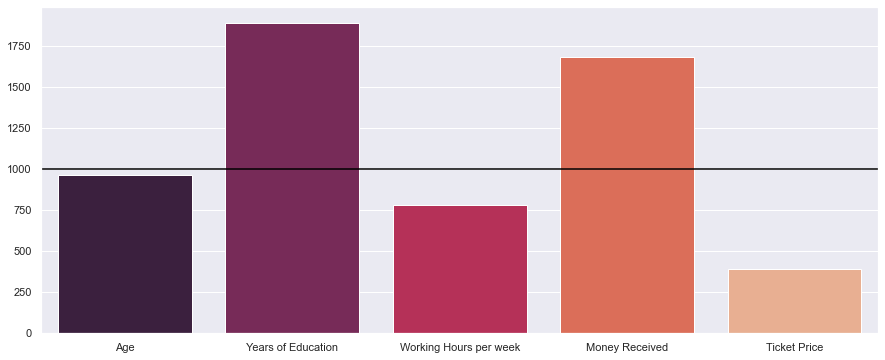

In [41]:
nominal_data = X_train[['Age','Years of Education','Working Hours per week','Money Received','Ticket Price']]
nominal_data_final = nominal_data.merge(target, on = 'CITIZEN_ID')

test = SelectKBest(score_func = f_classif, k = "all")
fit = test.fit(nominal_data, nominal_data_final.iloc[:,-1])

for i in range(len(fit.scores_)):
    print((nominal_data_final.columns[i], fit.scores_[i]))
sns.barplot(x = [i for i in nominal_data.columns], y = fit.scores_, palette = 'rocket')
plt.axhline(y = 1000, xmin = 0, xmax = 10, color = "black")
plt.show()

#### Keep the features with high F statistics

In [42]:
anova_variables = ['Years of Education', 'Money Received']
anova_variables

['Years of Education', 'Money Received']

### - Chi Squared Test

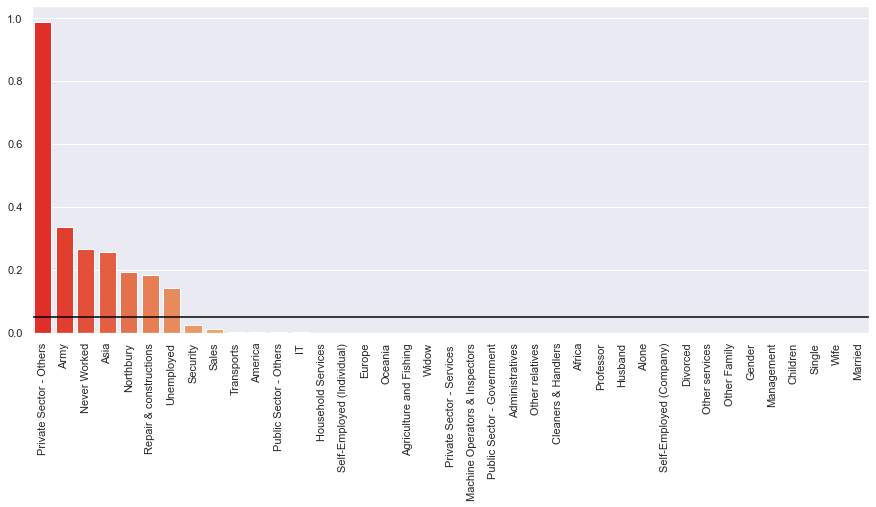

In [43]:
categorical_data = X_train.drop(columns = ['Age', 'Years of Education', 'Working Hours per week', 'Money Received', 
                                           'Ticket Price'])
categorical_data_final = categorical_data.merge(target, on = 'CITIZEN_ID')

chi_scores = chi2(categorical_data,categorical_data_final.iloc[:,-1])
p_values = pd.Series(chi_scores[1],index = categorical_data.columns)
p_values.sort_values(ascending = False , inplace = True)
sns.barplot(x = p_values.index, y = p_values.values, palette = 'rainbow_r')
plt.xticks(rotation = 90)
plt.axhline(y = 0.05, xmin = 0, xmax = 10, color = "black")
plt.show()

#### Keep the features with p_value below 5%

In [44]:
chi_squared_variables = list(set(p_values.index) - set(p_values.head(7).index))
print(chi_squared_variables)

['Security', 'Transports', 'America', 'Sales', 'IT', 'Oceania', 'Private Sector - Services ', 'Cleaners & Handlers', 'Machine Operators & Inspectors', 'Africa', 'Divorced', 'Europe', 'Other services', 'Professor', 'Administratives', 'Children', 'Self-Employed (Company)', 'Other Family', 'Household Services', 'Gender', 'Single', 'Husband', 'Public Sector - Government', 'Widow', 'Management', 'Wife', 'Self-Employed (Individual)', 'Other relatives', 'Married', 'Alone', 'Agriculture and Fishing', 'Public Sector - Others']


### Combining the 2 previous methods

In [45]:
correlation = list(chi_squared_variables) + list(anova_variables)
print(correlation)

['Security', 'Transports', 'America', 'Sales', 'IT', 'Oceania', 'Private Sector - Services ', 'Cleaners & Handlers', 'Machine Operators & Inspectors', 'Africa', 'Divorced', 'Europe', 'Other services', 'Professor', 'Administratives', 'Children', 'Self-Employed (Company)', 'Other Family', 'Household Services', 'Gender', 'Single', 'Husband', 'Public Sector - Government', 'Widow', 'Management', 'Wife', 'Self-Employed (Individual)', 'Other relatives', 'Married', 'Alone', 'Agriculture and Fishing', 'Public Sector - Others', 'Years of Education', 'Money Received']


## Ridge Regression

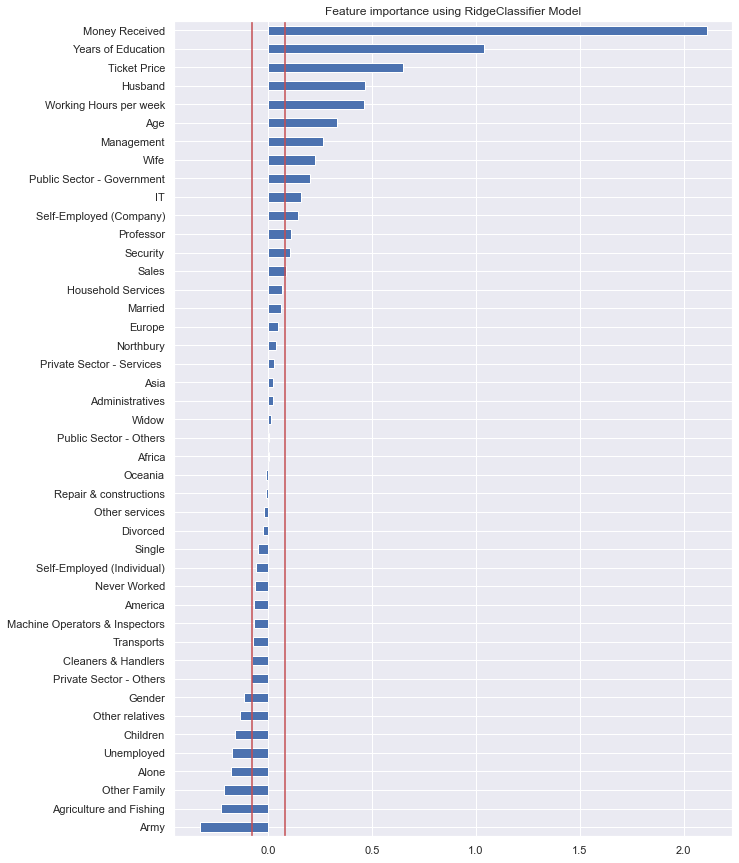

In [46]:
ridge = RidgeClassifierCV().fit(X = X_train,y = y_train)
coef_ridge = pd.Series(ridge.coef_[0], index = X_train.columns)
ridge_predictions = ridge.predict(X_train)

def plot_importance(coef,name, threshold):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(10,15))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.axvline(x = threshold, ymin = 0, ymax = 10, color = "r")
    plt.axvline(x = -threshold, ymin = 0, ymax = 10, color = "r")
    plt.show()
plot_importance(coef_ridge,'RidgeClassifier', 0.08)

In [47]:
ridge_variables = list(abs(coef_ridge)[abs(coef_ridge) >= 0.08].index)
print(ridge_variables)

['Gender', 'Age', 'Years of Education', 'Working Hours per week', 'Money Received', 'Ticket Price', 'Alone', 'Children', 'Husband', 'Other Family', 'Other relatives', 'Wife', 'Private Sector - Others', 'Public Sector - Government', 'Self-Employed (Company)', 'Unemployed', 'Agriculture and Fishing', 'Army', 'IT', 'Management', 'Professor', 'Sales', 'Security']


## Lasso Regression 

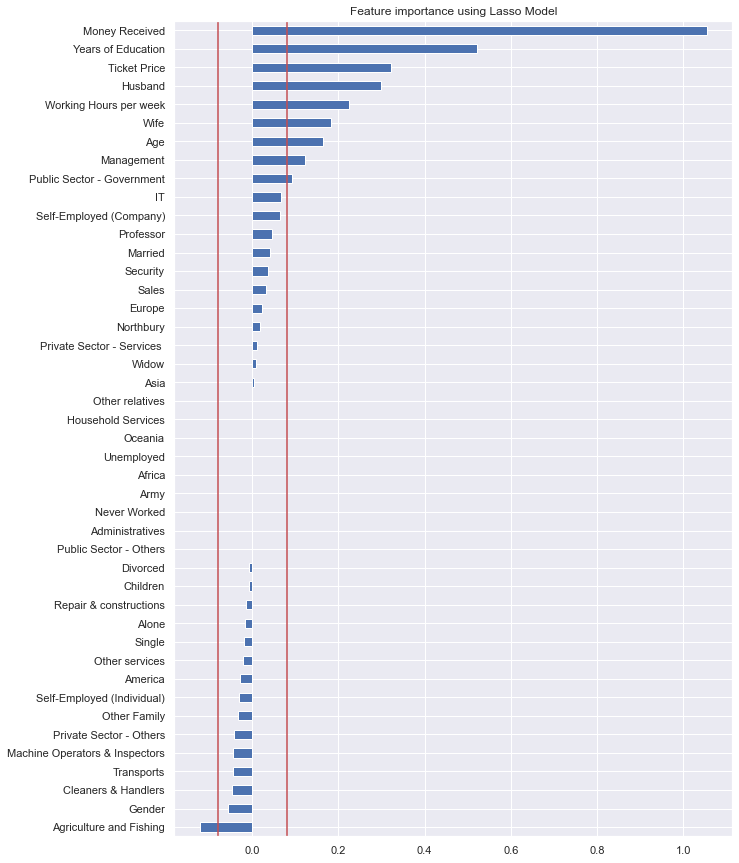

In [48]:
reg_lasso = LassoCV()
reg_lasso.fit(X = X_train,y = y_train)
coef_lasso = pd.Series(reg_lasso.coef_, index = X_train.columns)
plot_importance(coef_lasso, "Lasso", 0.08)

In [49]:
lasso_variables = list(abs(coef_lasso)[abs(coef_lasso) >= 0.08].index)
print(lasso_variables)

['Age', 'Years of Education', 'Working Hours per week', 'Money Received', 'Ticket Price', 'Husband', 'Wife', 'Public Sector - Government', 'Agriculture and Fishing', 'Management']


## RFE

In [50]:
def run_rfe(estimator):
    selector = RFECV(estimator, step=1, cv = 10)
    selector = selector.fit(X_train, y_train)
    return selector.support_, selector.ranking_

### For Logistic Regression

In [51]:
model_estimator_lr = LogisticRegression(random_state = 5)
rfe_logistic = run_rfe(model_estimator_lr)
selected_rfe_logistic = pd.Series(rfe_logistic[0], index = X_train.columns)
rfe_logistic_variables = list(selected_rfe_logistic[selected_rfe_logistic.values==True].index)
print(rfe_logistic_variables)

['Gender', 'Age', 'Years of Education', 'Working Hours per week', 'Money Received', 'Ticket Price', 'America', 'Asia', 'Europe', 'Oceania', 'Alone', 'Children', 'Husband', 'Other Family', 'Other relatives', 'Wife', 'Northbury', 'Never Worked', 'Private Sector - Others', 'Public Sector - Government', 'Self-Employed (Company)', 'Self-Employed (Individual)', 'Unemployed', 'Administratives', 'Agriculture and Fishing', 'Army', 'Cleaners & Handlers', 'Household Services', 'IT', 'Machine Operators & Inspectors', 'Management', 'Other services', 'Professor', 'Repair & constructions', 'Sales', 'Security', 'Divorced', 'Married', 'Single', 'Widow']


### For Decision Trees

In [52]:
model_estimator_dt = DecisionTreeClassifier(random_state = 5)
rfe_dt = run_rfe(model_estimator_dt)
selected_rfe_dt = pd.Series(rfe_dt[0], index = X_train.columns)
rfe_dt_variables = list(selected_rfe_dt[selected_rfe_dt.values == True].index)
print(rfe_dt_variables)

['Years of Education', 'Money Received', 'Married']


### For Gradient Boosting 

In [53]:
model_estimator_gb = GradientBoostingClassifier(random_state = 5)
rfe_gb = run_rfe(model_estimator_gb)
selected_rfe_gb = pd.Series(rfe_gb[0], index = X_train.columns)
rfe_gb_variables = list(selected_rfe_gb[selected_rfe_gb.values == True].index)
print(rfe_gb_variables)

['Gender', 'Age', 'Years of Education', 'Working Hours per week', 'Money Received', 'Ticket Price', 'Europe', 'Children', 'Husband', 'Wife', 'Northbury', 'Private Sector - Others', 'Private Sector - Services ', 'Public Sector - Government', 'Self-Employed (Company)', 'Self-Employed (Individual)', 'Agriculture and Fishing', 'Cleaners & Handlers', 'IT', 'Machine Operators & Inspectors', 'Management', 'Other services', 'Professor', 'Sales', 'Transports', 'Married', 'Single', 'Widow']


### For XGBoost

In [54]:
model_estimator_xgb = xgb.XGBClassifier(n_jobs = -1, random_state = 5, objective = 'binary:hinge')
rfe_xgb = run_rfe(model_estimator_xgb)
selected_rfe_xgb = pd.Series(rfe_xgb[0], index = X_train.columns)
rfe_xgb_variables = list(selected_rfe_xgb[selected_rfe_xgb.values == True].index)
print(rfe_xgb_variables)

['Gender', 'Age', 'Years of Education', 'Working Hours per week', 'Money Received', 'Ticket Price', 'Africa', 'Asia', 'Europe', 'Alone', 'Children', 'Husband', 'Other Family', 'Other relatives', 'Wife', 'Northbury', 'Private Sector - Others', 'Private Sector - Services ', 'Public Sector - Government', 'Public Sector - Others', 'Self-Employed (Individual)', 'Administratives', 'Agriculture and Fishing', 'Cleaners & Handlers', 'IT', 'Machine Operators & Inspectors', 'Management', 'Other services', 'Professor', 'Repair & constructions', 'Sales', 'Security', 'Transports', 'Divorced', 'Married', 'Single', 'Widow']


In [ ]:
Gender, Age, Years of Education, Working Hours per week, Money Received, Ticket Price, Africa, Asia, Europe, Alone, Children, Husband, Other Family, Other relatives, Wife, Northbury, Private Sector - Others, Private Sector - Services , Public Sector - Government, Public Sector - Others, Self-Employed (Individual), Administratives, Agriculture and Fishing, Cleaners & Handlers, IT, Machine Operators & Inspectors, Management, Other services, Professor, Repair & constructions, Sales, Security, Transports, Divorced, Married, Single, Widow

# Model Selection 

### For Cross Validation 

In [55]:
kfolds = KFold(n_splits = 10)

In [56]:
def avg_score(method,X,y,model_):
    score_train = []
    score_val = []
    for train_index, val_index in method.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        if model_ == xgb.XGBClassifier:
            model = model_(n_jobs = -1, random_state = 5, verbosity = 0).fit(X_train,y_train)
        else:
            try:
                model = model_(random_state = 5).fit(X_train,y_train)
            except: 
                model = model_().fit(X_train,y_train)
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        value_train = f1_score(y_train,y_pred_train, average = 'micro')
        value_val = f1_score(y_val,y_pred_val, average = 'micro')
        score_train.append(value_train)
        score_val.append(value_val)
    print('Train:', np.mean(score_train))
    print('Val:', np.mean(score_val))

## Logistic Regression 

In [57]:
print('Decision Trees')
avg_score(kfolds,X_train[dt_variables],y_train,LogisticRegression) 
print('_____________________________________________________')
print('Correlations')
avg_score(kfolds,X_train[correlation],y_train,LogisticRegression)
print('_____________________________________________________')
print('Ridge Regression')
avg_score(kfolds,X_train[ridge_variables],y_train,LogisticRegression)
print('_____________________________________________________')
print('Lasso Regression')
avg_score(kfolds,X_train[lasso_variables],y_train,LogisticRegression)
print('_____________________________________________________')
print('RFE')
avg_score(kfolds,X_train[rfe_logistic_variables],y_train,LogisticRegression)

Decision Trees
Train: 0.8449578295040043
Val: 0.8444013980804547
_____________________________________________________
Correlations
Train: 0.8427638473511685
Val: 0.8420982467689961
_____________________________________________________
Ridge Regression
Train: 0.8465813897755897
Val: 0.8464422577180277
_____________________________________________________
Lasso Regression
Train: 0.8452503683023378
Val: 0.8451258618897475
_____________________________________________________
RFE
Train: 0.8495359597534939
Val: 0.8479559353452757


## Neural Networks

In [58]:
print('Decision Trees')
avg_score(kfolds,X_train[dt_variables],y_train,MLPClassifier) 
print('_____________________________________________________')
print('Correlations')
avg_score(kfolds,X_train[correlation],y_train,MLPClassifier)
print('_____________________________________________________')
print('Ridge Regression')
avg_score(kfolds,X_train[ridge_variables],y_train,MLPClassifier)
print('_____________________________________________________')
print('Lasso Regression')
avg_score(kfolds,X_train[lasso_variables],y_train,MLPClassifier)

Decision Trees
Train: 0.8611129586979251
Val: 0.8494701760160771
_____________________________________________________
Correlations
Train: 0.8565347845898659
Val: 0.841900098749177
_____________________________________________________
Ridge Regression
Train: 0.8631021641198157
Val: 0.8515768251273345
_____________________________________________________
Lasso Regression
Train: 0.8554817007553119
Val: 0.8512477478257857


## Decision Trees

In [59]:
print('Decision Trees')
avg_score(kfolds,X_train[dt_variables],y_train,DecisionTreeClassifier) 
print('_____________________________________________________')
print('Correlations')
avg_score(kfolds,X_train[correlation],y_train,DecisionTreeClassifier) 
print('_____________________________________________________')
print('Ridge Regression')
avg_score(kfolds,X_train[ridge_variables],y_train,DecisionTreeClassifier) 
print('_____________________________________________________')
print('Lasso Regression')
avg_score(kfolds,X_train[lasso_variables],y_train,DecisionTreeClassifier) 
print('_____________________________________________________')
print('RFE')
avg_score(kfolds,X_train[rfe_dt_variables],y_train,DecisionTreeClassifier)

Decision Trees
Train: 0.9766851647136926
Val: 0.8122164426042063
_____________________________________________________
Correlations
Train: 0.8819266130387613
Val: 0.8350551782682512
_____________________________________________________
Ridge Regression
Train: 0.9638941824934326
Val: 0.8130066525761409
_____________________________________________________
Lasso Regression
Train: 0.940579357369477
Val: 0.8253144814801983
_____________________________________________________
RFE
Train: 0.8470348108996589
Val: 0.8451255154014069


## Naive Bayes

In [60]:
print('Decision Trees')
avg_score(kfolds,X_train[dt_variables],y_train,GaussianNB) 
print('_____________________________________________________')
print('Correlations')
avg_score(kfolds,X_train[correlation],y_train,GaussianNB)
print('_____________________________________________________')
print('Ridge Regression')
avg_score(kfolds,X_train[ridge_variables],y_train,GaussianNB)
print('_____________________________________________________')
print('Lasso Regression')
avg_score(kfolds,X_train[lasso_variables],y_train,GaussianNB)

Decision Trees
Train: 0.8105487010851391
Val: 0.8095179047850041
_____________________________________________________
Correlations
Train: 0.5872221159810775
Val: 0.5861884550084889
_____________________________________________________
Ridge Regression
Train: 0.5050278362318018
Val: 0.504704835244794
_____________________________________________________
Lasso Regression
Train: 0.7949713614772917
Val: 0.7949054086829979


## KNN

In [61]:
print('Decision Trees')
avg_score(kfolds,X_train[dt_variables],y_train,KNeighborsClassifier)
print('_____________________________________________________')
print('Correlations')
avg_score(kfolds,X_train[correlation],y_train,KNeighborsClassifier)
print('_____________________________________________________')
print('Ridge Regression')
avg_score(kfolds,X_train[ridge_variables],y_train,KNeighborsClassifier)
print('_____________________________________________________')
print('Lasso Regression')
avg_score(kfolds,X_train[lasso_variables],y_train,KNeighborsClassifier)

Decision Trees
Train: 0.8761052100118931
Val: 0.8208373756973076
_____________________________________________________
Correlations
Train: 0.8288978857077984
Val: 0.8058300994421537
_____________________________________________________
Ridge Regression
Train: 0.8783723439798512
Val: 0.833673599320883
_____________________________________________________
Lasso Regression
Train: 0.876895049898269
Val: 0.8361749419632029


## Ada Boost

In [62]:
print('Decision Trees')
avg_score(kfolds,X_train[dt_variables],y_train,AdaBoostClassifier)
print('_____________________________________________________')
print('Correlations')
avg_score(kfolds,X_train[correlation],y_train,AdaBoostClassifier)
print('_____________________________________________________')
print('Ridge Regression')
avg_score(kfolds,X_train[ridge_variables],y_train,AdaBoostClassifier)
print('_____________________________________________________')
print('Lasso Regression')
avg_score(kfolds,X_train[lasso_variables],y_train,AdaBoostClassifier)

Decision Trees
Train: 0.8551379661696602
Val: 0.8544726880565469
_____________________________________________________
Correlations
Train: 0.8480074939533206
Val: 0.8475608520148297
_____________________________________________________
Ridge Regression
Train: 0.8580852518809949
Val: 0.8561842538373584
_____________________________________________________
Lasso Regression
Train: 0.856461688400246
Val: 0.855657808114757


## Gradient Boosting 

In [63]:
print('Decision Trees')
avg_score(kfolds,X_train[dt_variables],y_train,GradientBoostingClassifier)
print('_____________________________________________________')
print('Correlations')
avg_score(kfolds,X_train[correlation],y_train,GradientBoostingClassifier)
print('_____________________________________________________')
print('Ridge Regression')
avg_score(kfolds,X_train[ridge_variables],y_train,GradientBoostingClassifier)
print('_____________________________________________________')
print('Lasso Regression')
avg_score(kfolds,X_train[lasso_variables],y_train,GradientBoostingClassifier)
print('_____________________________________________________')
print('RFE')
avg_score(kfolds,X_train[rfe_gb_variables],y_train,GradientBoostingClassifier)

Decision Trees
Train: 0.8631899186991557
Val: 0.8577635476941202
_____________________________________________________
Correlations
Train: 0.8539166371182926
Val: 0.8500618481688091
_____________________________________________________
Ridge Regression
Train: 0.8673000036659346
Val: 0.862107515332109
_____________________________________________________
Lasso Regression
Train: 0.8661006145965533
Val: 0.8616470756384047
_____________________________________________________
RFE
Train: 0.8669343371212055
Val: 0.8609886178580091


## SVM

In [64]:
print('Decision Trees')
avg_score(kfolds,X_train[dt_variables],y_train,SVC)
print('_____________________________________________________')
print('Correlations')
avg_score(kfolds,X_train[correlation],y_train,SVC)
print('_____________________________________________________')
print('Ridge Regression')
avg_score(kfolds,X_train[ridge_variables],y_train,SVC)
print('_____________________________________________________')
print('Lasso Regression')
avg_score(kfolds,X_train[lasso_variables],y_train,SVC)

Decision Trees
Train: 0.8478465934423245
Val: 0.8420982900800388
_____________________________________________________
Correlations
Train: 0.8459963014817106
Val: 0.8402554052181145
_____________________________________________________
Ridge Regression
Train: 0.8516568441121277
Val: 0.8462451924742732
_____________________________________________________
Lasso Regression
Train: 0.8510498211848679
Val: 0.8485486036519869


## XGBoost

In [65]:
print('Decision Trees')
avg_score(kfolds,X_train[dt_variables],y_train,xgb.XGBClassifier)
print('_____________________________________________________')
print('Correlations')
avg_score(kfolds,X_train[correlation],y_train,xgb.XGBClassifier)
print('_____________________________________________________')
print('Ridge Regression')
avg_score(kfolds,X_train[ridge_variables],y_train,xgb.XGBClassifier)
print('_____________________________________________________')
print('Lasso Regression')
avg_score(kfolds,X_train[lasso_variables],y_train,xgb.XGBClassifier)
print('_____________________________________________________')
print('RFE')
avg_score(kfolds,X_train[rfe_xgb_variables],y_train,xgb.XGBClassifier)

Decision Trees
Train: 0.898030546445364
Val: 0.8575660926509823
_____________________________________________________
Correlations
Train: 0.8671683637740154
Val: 0.8554597467170231
_____________________________________________________
Ridge Regression
Train: 0.8977672581037561
Val: 0.8636873289213817
_____________________________________________________
Lasso Regression
Train: 0.88896201859644
Val: 0.8611201968053775
_____________________________________________________
RFE
Train: 0.9048318986072026
Val: 0.8672409566543087


# Improving Results

##### Models where performance can be improved: Neural Networks, Decision Trees, Ada Boost, Gradient Boosting and XGBoost.

Variables to be used: 
 - NN : ridge_variables 
 - DT : dt_variables and ridge_variables
 - Ada Boost : ridge_variables
 - Gradient Boosting : ridge_variables and rfe_gb_variables
 - XGBoost : ridge_variables and rfe_xgb_variables

In [66]:
def avg_score_tunning(model,X,y,kf):
    score_train = []
    score_val = []
    timer = []
    n_iter = []
    for train_index, val_index in kf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]            
        begin = time.perf_counter()
        model.fit(X_train, y_train)
        end = time.perf_counter()
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        value_train = f1_score(y_train, y_pred_train, average = 'micro')
        value_val = f1_score(y_val, y_pred_val, average = 'micro')
        score_train.append(value_train)
        score_val.append(value_val)
        timer.append(end-begin)
        try:
            n_iter.append(model.n_iter_)
            avg_time = round(np.mean(timer),3)
            avg_train = round(np.mean(score_train),3)
            avg_val = round(np.mean(score_val),3)
            std_time = round(np.std(timer),2)
            std_train = round(np.std(score_train),2)
            std_val = round(np.std(score_val),2)
            avg_iter = round(np.mean(n_iter),1)
            std_iter = round(np.std(n_iter),1)
            return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
        str(avg_val) + '+/-' + str(std_val), str(avg_iter) + '+/-' + str(std_iter)

        except:
            avg_time = round(np.mean(timer),3)
            avg_train = round(np.mean(score_train),3)
            avg_val = round(np.mean(score_val),3)
            std_time = round(np.std(timer),2)
            std_train = round(np.std(score_train),2)
            std_val = round(np.std(score_val),2)

            return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
        str(avg_val) + '+/-' + str(std_val)
        
        
def show_results(df,X,y,kf,args):
    count = 0
    for arg in args:
        try:
            time, avg_train, avg_val, avg_iter = avg_score_tunning(arg,X,y,kf)
            df.iloc[count] = time, avg_train, avg_val, avg_iter
            count+=1
        except:
            time, avg_train, avg_test = avg_score_tunning(arg,X,y,kf)
            df.iloc[count] = time, avg_train, avg_test
            count+=1
    return df

## Neural Networks Hyperparameters Tunning

### - ridge_variables

In [69]:
model = MLPClassifier()

# Hidden layer sizes
model_hl1 = MLPClassifier(max_iter = 400, hidden_layer_sizes=(1))
model_hl2 = MLPClassifier(max_iter = 400, hidden_layer_sizes = (9))
model_hl3 = MLPClassifier(max_iter = 400, hidden_layer_sizes = (11))
model_hl4 = MLPClassifier(max_iter = 400, hidden_layer_sizes = (15))
model_hl5 = MLPClassifier(max_iter = 400, hidden_layer_sizes = (20))
model_hl6 = MLPClassifier(max_iter = 400, hidden_layer_sizes = (11,3))

# Activation function
model_af1 = MLPClassifier(max_iter = 400, activation = 'relu')
model_af2 = MLPClassifier(max_iter = 400, activation = 'logistic')
model_af3 = MLPClassifier(max_iter = 400, activation = 'tanh')

# Solver 
model_solver1 = MLPClassifier(max_iter = 400, solver = 'lbfgs')
model_solver2 = MLPClassifier(max_iter = 400, solver = 'sgd')
model_solver3 = MLPClassifier(max_iter = 400, solver = 'adam')

# Learning Rate
model_ln1 = MLPClassifier(max_iter = 400, solver = 'sgd', learning_rate = 'constant')
model_ln2 = MLPClassifier(max_iter = 400, solver = 'sgd', learning_rate = 'invscaling')
model_ln3 = MLPClassifier(max_iter = 400, solver = 'sgd', learning_rate = 'adaptive')

# Learning Rate Initialization

model_lri1= MLPClassifier(max_iter = 400, learning_rate_init = 0.0001)
model_lri2 = MLPClassifier(max_iter = 400, learning_rate_init = 0.0002)
model_lri3 = MLPClassifier(max_iter = 400, learning_rate_init = 0.001)
model_lri4 = MLPClassifier(max_iter = 400, learning_rate_init = 0.01)
model_lri5 = MLPClassifier(max_iter = 400, learning_rate_init = 0.1)
model_lri6 = MLPClassifier(max_iter = 400, learning_rate_init = 0.3)

# Batch Size 
model_bs1 = MLPClassifier(max_iter = 400, batch_size = 50)
model_bs2 = MLPClassifier(max_iter = 400, batch_size = 300)
model_bs3 = MLPClassifier(max_iter = 400, batch_size = 400)

df = pd.DataFrame(columns = ['Time','Train','Val', 'Iterations'], index = ['Raw', 'Hidden_layer = (1)', 'Hidden_layer = (9)', 
                 'Hidden_layer = (11)', 'Hidden_layer = (15)', 'Hidden_layer = (20)', 'Hidden_layer = (11,3)', 
                 'activation = relu', 'activation = logistic', 'activation = tanh', 'solver = lbfgs', 'solver = sgd', 
                 'solver = adam', 'learning_rate = constant', 'learning_rate = invscaling', 'learning_rate = adaptive', 
                 'learning_rate_init = 0.0001', 'learning_rate_init = 0.0002', 'learning_rate_init = 0.001', 
                 'learning_rate_init = 0.01', 'learning_rate_init = 0.1', 'learning_rate_init = 0.3', 'batch_size = 50', 
                 'batch_size = 300', 'batch_size = 400'])

show_results(df,X_train[ridge_variables], y_train, kfolds, [model, model_hl1, model_hl2, model_hl3, model_hl4, model_hl5, 
                                                            model_hl6, model_af1, model_af2, model_af3, model_solver1, 
                                                            model_solver2, model_solver3, model_ln1, model_ln2, model_ln3, 
                                                            model_lri1, model_lri2, model_lri3, model_lri4, model_lri5, 
                                                            model_lri6, model_bs1, model_bs2, model_bs3])

,Time,Train,Val,Iterations
Raw,24.959+/-0.0,0.865+/-0.0,0.846+/-0.0,200.0+/-0.0
Hidden_layer = (1),3.915+/-0.0,0.848+/-0.0,0.843+/-0.0,132.0+/-0.0
Hidden_layer = (9),6.54+/-0.0,0.856+/-0.0,0.845+/-0.0,202.0+/-0.0
Hidden_layer = (11),8.571+/-0.0,0.859+/-0.0,0.849+/-0.0,251.0+/-0.0
Hidden_layer = (15),12.669+/-0.0,0.858+/-0.0,0.844+/-0.0,215.0+/-0.0
Hidden_layer = (20),15.067+/-0.0,0.857+/-0.0,0.845+/-0.0,241.0+/-0.0
"Hidden_layer = (11,3)",9.513+/-0.0,0.854+/-0.0,0.84+/-0.0,209.0+/-0.0
activation = relu,36.062+/-0.0,0.867+/-0.0,0.848+/-0.0,274.0+/-0.0
activation = logistic,5.331+/-0.0,0.848+/-0.0,0.841+/-0.0,56.0+/-0.0
activation = tanh,3.522+/-0.0,0.847+/-0.0,0.838+/-0.0,32.0+/-0.0


### Grid Search

#### - solver = 'lbfgs'

In [71]:
parameter_space_lbfgs = {
    'hidden_layer_sizes': [(100,),(9,),(11,),(20,)],
    'activation': ['relu','logistic'],
    'solver': ['lbfgs'],
    'learning_rate_init': [0.0001,0.0002,0.001],
    'max_iter' : [400]
}

In [72]:
clf_lbfgs = GridSearchCV(model, parameter_space_lbfgs, scoring = 'f1_micro').fit(X_train[ridge_variables], y_train)

In [73]:
clf_lbfgs.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (11,),
 'learning_rate_init': 0.0001,
 'max_iter': 400,
 'solver': 'lbfgs'}

In [74]:
clf_lbfgs.best_score_

0.8565777869916238

In [75]:
best_model_NN_lbfgs = clf_lbfgs.best_estimator_
y_pred_train = best_model_NN_lbfgs.predict(X_train[ridge_variables])
y_pred_test = best_model_NN_lbfgs.predict(X_test[ridge_variables])
value_train = f1_score(y_train, y_pred_train, average = 'micro')
value_test = f1_score(y_test, y_pred_test, average = 'micro')

In [76]:
value_train

0.8644770618047786

In [77]:
value_test

0.8531941031941032

#### - solver = 'adam'

In [79]:
parameter_space_adam = {
    'hidden_layer_sizes': [(100,),(9,),(11,),(20,)],
    'activation': ['relu','logistic'],
    'solver': ['adam'],
    'learning_rate_init': [0.0001,0.0002,0.001],
    'batch_size': ['auto',50,300,400],
    'max_iter' : [400]
}

In [80]:
clf_adam = GridSearchCV(model, parameter_space_adam, scoring = 'f1_micro').fit(X_train[ridge_variables], y_train)

In [81]:
clf_adam.best_params_

{'activation': 'relu',
 'batch_size': 300,
 'hidden_layer_sizes': (100,),
 'learning_rate_init': 0.001,
 'max_iter': 400,
 'solver': 'adam'}

In [82]:
clf_adam.best_score_

0.8536820759574727

In [83]:
best_model_NN_adam = clf_adam.best_estimator_
y_pred_train = best_model_NN_adam.predict(X_train[ridge_variables])
y_pred_test = best_model_NN_adam.predict(X_test[ridge_variables])
value_train = f1_score(y_train, y_pred_train, average = 'micro')
value_test = f1_score(y_test, y_pred_test, average = 'micro')

In [84]:
value_train

0.8650036200881985

In [85]:
value_test

0.8513513513513514

## Decision Trees Hyperparameters Tunning

### - ridge_variables

In [89]:
model_entropy = DecisionTreeClassifier(criterion = 'entropy')
model_gini = DecisionTreeClassifier(criterion = 'gini')

# Splitter
model_splitter1 = DecisionTreeClassifier(splitter = 'best')
model_splitter2 = DecisionTreeClassifier(splitter = 'random')

# Max_depth
model_md1 = DecisionTreeClassifier(max_depth = 4)
model_md2 = DecisionTreeClassifier(max_depth = 5)
model_md3 = DecisionTreeClassifier(max_depth = 6)
model_md4 = DecisionTreeClassifier(max_depth = 7)

# Min_samples_split
model_mss1 = DecisionTreeClassifier(min_samples_split = 10) 
model_mss2 = DecisionTreeClassifier(min_samples_split = 50) 
model_mss3 = DecisionTreeClassifier(min_samples_split = 100)
model_mss4 = DecisionTreeClassifier(min_samples_split = 150) 
model_mss5 = DecisionTreeClassifier(min_samples_split = 200) 
model_mss6 = DecisionTreeClassifier(min_samples_split = 300) 

# Min_samples_leaf
model_msl1 = DecisionTreeClassifier(min_samples_leaf = 80) 
model_msl2 = DecisionTreeClassifier(min_samples_leaf = 100) 
model_msl3 = DecisionTreeClassifier(min_samples_leaf = 250)
model_msl4 = DecisionTreeClassifier(min_samples_leaf = 300) 

# Min_weight_fraction_leaf
model_mwf1 = DecisionTreeClassifier(min_weight_fraction_leaf = 0.02)
model_mwf2 = DecisionTreeClassifier(min_weight_fraction_leaf = 0.005)

# Max_features
model_mf1 = DecisionTreeClassifier(max_features = 'log2')
model_mf2 = DecisionTreeClassifier(max_features = 'sqrt')
model_mf3 = DecisionTreeClassifier(max_features = 'auto')

# Max_leaf_nodes
model_mln1 = DecisionTreeClassifier(max_leaf_nodes = 5)
model_mln2 = DecisionTreeClassifier(max_leaf_nodes = 6)
model_mln3 = DecisionTreeClassifier(max_leaf_nodes = 7)

# Min_impurity_decrease
model_mid1 = DecisionTreeClassifier(min_impurity_decrease = 0.02)

df = pd.DataFrame(columns = ['Time','Train','Val'], index = ['Raw entropy', 'Raw gini', 'Splitter = best', 'Splitter = random',
                 'Max_depth = 4', 'Max_depth = 5', 'Max_depth = 6', 'Max_depth = 7', 'Min_samples_split = 10',
                 'Min_samples_split = 50', 'Min_samples_split = 100', 'Min_samples_split = 150', 'Min_samples_split = 200',
                 'Min_samples_split = 300', 'Min_samples_leaf = 80', 'Min_samples_leaf = 100', 'Min_samples_leaf = 250', 
                 'Min_samples_leaf = 300', 'Min_weight_fraction_leaf = 0.02', 'Min_weight_fraction_leaf = 0.005', 
                 'Max_features = log2', 'Max_features = sqrt', 'Max_features = auto', 'Max_leaf_nodes = 5', 
                 'Max_leaf_nodes = 6', 'Max_leaf_nodes = 7', 'Min_impurity_decrease = 0.02'])

show_results(df,X_train[ridge_variables], y_train, kfolds, [model_entropy, model_gini, model_splitter1, model_splitter2, 
                                                            model_md1, model_md2, model_md3, model_md4, model_mss1, model_mss2, 
                                                            model_mss3, model_mss4, model_mss5, model_mss6, model_msl1, 
                                                            model_msl2, model_msl3, model_msl4, model_mwf1, model_mwf2, 
                                                            model_mf1, model_mf2, model_mf3, model_mln1, model_mln2, 
                                                            model_mln3, model_mid1])

,Time,Train,Val
Raw entropy,0.053+/-0.0,0.964+/-0.0,0.81+/-0.0
Raw gini,0.045+/-0.0,0.964+/-0.0,0.812+/-0.0
Splitter = best,0.04+/-0.0,0.964+/-0.0,0.811+/-0.0
Splitter = random,0.024+/-0.0,0.964+/-0.0,0.813+/-0.0
Max_depth = 4,0.012+/-0.0,0.85+/-0.0,0.845+/-0.0
Max_depth = 5,0.016+/-0.0,0.856+/-0.0,0.849+/-0.0
Max_depth = 6,0.019+/-0.0,0.859+/-0.0,0.848+/-0.0
Max_depth = 7,0.021+/-0.0,0.86+/-0.0,0.847+/-0.0
Min_samples_split = 10,0.037+/-0.0,0.917+/-0.0,0.824+/-0.0
Min_samples_split = 50,0.034+/-0.0,0.883+/-0.0,0.839+/-0.0


### - dt_variables

In [90]:
model_entropy = DecisionTreeClassifier(criterion = 'entropy')
model_gini = DecisionTreeClassifier(criterion = 'gini')

# Splitter
model_splitter1 = DecisionTreeClassifier(splitter = 'best')
model_splitter2 = DecisionTreeClassifier(splitter = 'random')

# Max_depth
model_md1 = DecisionTreeClassifier(max_depth = 4)
model_md2 = DecisionTreeClassifier(max_depth = 5)
model_md3 = DecisionTreeClassifier(max_depth = 6)
model_md4 = DecisionTreeClassifier(max_depth = 7)

# Min_samples_split
model_mss1 = DecisionTreeClassifier(min_samples_split = 10) 
model_mss2 = DecisionTreeClassifier(min_samples_split = 50) 
model_mss3 = DecisionTreeClassifier(min_samples_split = 100)
model_mss4 = DecisionTreeClassifier(min_samples_split = 150) 
model_mss5 = DecisionTreeClassifier(min_samples_split = 200) 
model_mss6 = DecisionTreeClassifier(min_samples_split = 300) 

# Min_samples_leaf
model_msl1 = DecisionTreeClassifier(min_samples_leaf = 80) 
model_msl2 = DecisionTreeClassifier(min_samples_leaf = 100) 
model_msl3 = DecisionTreeClassifier(min_samples_leaf = 250)
model_msl4 = DecisionTreeClassifier(min_samples_leaf = 300) 

# Min_weight_fraction_leaf
model_mwf1 = DecisionTreeClassifier(min_weight_fraction_leaf = 0.02)
model_mwf2 = DecisionTreeClassifier(min_weight_fraction_leaf = 0.005)

# Max_features
model_mf1 = DecisionTreeClassifier(max_features = 'log2')
model_mf2 = DecisionTreeClassifier(max_features = 'sqrt')
model_mf3 = DecisionTreeClassifier(max_features = 'auto')

# Max_leaf_nodes
model_mln1 = DecisionTreeClassifier(max_leaf_nodes = 5)
model_mln2 = DecisionTreeClassifier(max_leaf_nodes = 6)
model_mln3 = DecisionTreeClassifier(max_leaf_nodes = 7)

# Min_impurity_decrease
model_mid1 = DecisionTreeClassifier(criterion = 'entropy', min_impurity_decrease = 0.02)

df = pd.DataFrame(columns = ['Time','Train','Val'], index = ['Raw entropy', 'Raw gini', 'Splitter = best', 'Splitter = random',
                 'Max_depth = 4', 'Max_depth = 5', 'Max_depth = 6', 'Max_depth = 7', 'Min_samples_split = 10',
                 'Min_samples_split = 50', 'Min_samples_split = 100', 'Min_samples_split = 150', 'Min_samples_split = 200',
                 'Min_samples_split = 300', 'Min_samples_leaf = 80', 'Min_samples_leaf = 100', 'Min_samples_leaf = 250', 
                 'Min_samples_leaf = 300', 'Min_weight_fraction_leaf = 0.02', 'Min_weight_fraction_leaf = 0.005', 
                 'Max_features = log2', 'Max_features = sqrt', 'Max_features = auto', 'Max_leaf_nodes = 5', 
                 'Max_leaf_nodes = 6', 'Max_leaf_nodes = 7', 'Min_impurity_decrease = 0.02' ])

show_results(df,X_train[dt_variables], y_train, kfolds, [model_entropy, model_gini, model_splitter1, model_splitter2, 
                                                            model_md1, model_md2, model_md3, model_md4, model_mss1, model_mss2, 
                                                            model_mss3, model_mss4, model_mss5, model_mss6, model_msl1, 
                                                            model_msl2, model_msl3, model_msl4, model_mwf1, model_mwf2, 
                                                            model_mf1, model_mf2, model_mf3, model_mln1, model_mln2, 
                                                            model_mln3, model_mid1])

,Time,Train,Val
Raw entropy,0.05+/-0.0,0.977+/-0.0,0.807+/-0.0
Raw gini,0.037+/-0.0,0.977+/-0.0,0.802+/-0.0
Splitter = best,0.034+/-0.0,0.977+/-0.0,0.795+/-0.0
Splitter = random,0.02+/-0.0,0.977+/-0.0,0.796+/-0.0
Max_depth = 4,0.012+/-0.0,0.848+/-0.0,0.843+/-0.0
Max_depth = 5,0.013+/-0.0,0.854+/-0.0,0.844+/-0.0
Max_depth = 6,0.016+/-0.0,0.854+/-0.0,0.843+/-0.0
Max_depth = 7,0.017+/-0.0,0.856+/-0.0,0.841+/-0.0
Min_samples_split = 10,0.036+/-0.0,0.921+/-0.0,0.821+/-0.0
Min_samples_split = 50,0.031+/-0.0,0.883+/-0.0,0.836+/-0.0


### Grid Search

In [91]:
parameter_space_dt = {
    'criterion': ['gini','entropy'],
    'splitter': ['best','random'],
    'max_depth': [None,4,5,6,7],
    'min_samples_split': [2,10,50,100,150,200,300],
    'min_samples_leaf': [1,80,100,250,300],
    'min_weight_fraction_leaf': [0.0,0.02,0.005],
    'max_features' : [None,'auto','sqrt','log2'],
    'random_state': [5],
    'max_leaf_nodes': [None,5,6,7],
    'min_impurity_decrease': [0.0, 0.02]
}

#### - ridge_variables

In [92]:
clf_dt_ridge = GridSearchCV(DecisionTreeClassifier(), parameter_space_dt, 
                            scoring = 'f1_micro').fit(X_train[ridge_variables], y_train)

In [93]:
clf_dt_ridge.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 100,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 5,
 'splitter': 'best'}

In [94]:
clf_dt_ridge.best_score_

0.8535504970386079

In [95]:
best_model_dt_ridge = clf_dt_ridge.best_estimator_
y_pred_train = best_model_dt_ridge.predict(X_train[ridge_variables])
y_pred_test = best_model_dt_ridge.predict(X_test[ridge_variables])
value_train = f1_score(y_train, y_pred_train, average = 'micro')
value_test = f1_score(y_test, y_pred_test, average = 'micro')

In [96]:
value_train

0.8744816691897584

In [97]:
value_test

0.8516584766584766

#### - dt_variables

In [98]:
clf_dt_dt = GridSearchCV(DecisionTreeClassifier(), 
                         parameter_space_dt, scoring = 'f1_micro').fit(X_train[dt_variables], y_train)

In [99]:
clf_dt_dt.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 100,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 5,
 'splitter': 'best'}

In [100]:
clf_dt_dt.best_score_

0.8513790116243932

In [101]:
best_model_dt_dt = clf_dt_dt.best_estimator_
y_pred_train = best_model_dt_dt.predict(X_train[dt_variables])
y_pred_test = best_model_dt_dt.predict(X_test[dt_variables])
value_train = f1_score(y_train, y_pred_train, average = 'micro')
value_test = f1_score(y_test, y_pred_test, average = 'micro')

In [102]:
value_train

0.8701375633515435

In [103]:
value_test

0.8488943488943489

### Bagging for the Decision Trees

Bagging for the Neural Networks takes a lot of time and for the Random Forests gives bad results.

#### - ridge_variables

In [104]:
model_bg = BaggingClassifier(base_estimator = best_model_dt_ridge, random_state = 5)

# N_estimators
model_bg_ne1 = BaggingClassifier(base_estimator = best_model_dt_ridge, random_state = 5, n_estimators = 10)
model_bg_ne2 = BaggingClassifier(base_estimator = best_model_dt_ridge, random_state = 5, n_estimators = 100)
model_bg_ne3 = BaggingClassifier(base_estimator = best_model_dt_ridge, random_state = 5, n_estimators = 500)
model_bg_ne4 = BaggingClassifier(base_estimator = best_model_dt_ridge, random_state = 5, n_estimators = 600)
model_bg_ne5 = BaggingClassifier(base_estimator = best_model_dt_ridge, random_state = 5, n_estimators = 700)

# Max_features
model_bg_mf1 = BaggingClassifier(base_estimator = best_model_dt_ridge, random_state = 5, max_features = 0.25)
model_bg_mf2 = BaggingClassifier(base_estimator = best_model_dt_ridge, random_state = 5, max_features = 0.5)
model_bg_mf3 = BaggingClassifier(base_estimator = best_model_dt_ridge, random_state = 5, max_features = 0.75)

# Max_samples
model_bg_ms1 = BaggingClassifier(base_estimator = best_model_dt_ridge, random_state = 5, max_samples = 0.25)
model_bg_ms2 = BaggingClassifier(base_estimator = best_model_dt_ridge, random_state = 5, max_samples = 0.5)
model_bg_ms3 = BaggingClassifier(base_estimator = best_model_dt_ridge, random_state = 5, max_samples = 0.75)

df = pd.DataFrame(columns = ['Time','Train','Val'], index = ['Raw', 'N_estimators = 10', 'N_estimators = 100', 
                'N_estimators = 500', 'N_estimators = 600', 'N_estimators = 700', 'Max_features = 0.25', 'Max_features = 0.5', 
                'Max_features = 0.75', 'Max_samples = 0.25', 'Max_samples = 0.5', 'Max_samples = 0.75'])

show_results(df,X_train[ridge_variables], y_train, kfolds, [model_bg, model_bg_ne1, model_bg_ne2, model_bg_ne3, model_bg_ne4,
                                                            model_bg_ne5, model_bg_mf1, model_bg_mf2, model_bg_mf3, 
                                                            model_bg_ms1, model_bg_ms2, model_bg_ms3])

,Time,Train,Val
Raw,0.263+/-0.0,0.874+/-0.0,0.847+/-0.0
N_estimators = 10,0.263+/-0.0,0.874+/-0.0,0.847+/-0.0
N_estimators = 50,1.382+/-0.0,0.878+/-0.0,0.846+/-0.0
N_estimators = 100,2.619+/-0.0,0.876+/-0.0,0.845+/-0.0
Max_features = 0.25,0.055+/-0.0,0.811+/-0.0,0.804+/-0.0
Max_features = 0.5,0.126+/-0.0,0.864+/-0.0,0.845+/-0.0
Max_features = 0.75,0.189+/-0.0,0.872+/-0.0,0.842+/-0.0
Max_samples = 0.25,0.111+/-0.0,0.863+/-0.0,0.844+/-0.0
Max_samples = 0.5,0.174+/-0.0,0.871+/-0.0,0.851+/-0.0
Max_samples = 0.75,0.218+/-0.0,0.872+/-0.0,0.845+/-0.0


##### Grid Search

In [105]:
parameter_space_dt_ridge_bg = {
    'base_estimator': [best_model_dt_ridge],
    'n_estimators':[10,100,500,600,700],
    'max_samples':[0.25,0.5,0.75,1],
    'max_features':[0.25,0.5,0.75,1],
    'bootstrap':[True,False],
    'bootstrap_features':[False,True],
    'random_state':[5]
}

In [106]:
clf_dt_ridge_bg = GridSearchCV(BaggingClassifier(), parameter_space_dt_ridge_bg, 
                            scoring = 'f1_micro').fit(X_train[ridge_variables], y_train)

In [107]:
clf_dt_ridge_bg.best_params_

{'base_estimator': DecisionTreeClassifier(criterion='entropy', min_samples_split=100,
                        random_state=5),
 'bootstrap': False,
 'bootstrap_features': False,
 'max_features': 0.75,
 'max_samples': 0.5,
 'n_estimators': 50,
 'random_state': 5}

In [108]:
clf_dt_ridge_bg.best_score_

0.8618438248782938

In [109]:
best_model_dt_ridge_bg = clf_dt_ridge_bg.best_estimator_
y_pred_train = best_model_dt_ridge_bg.predict(X_train[ridge_variables])
y_pred_test = best_model_dt_ridge_bg.predict(X_test[ridge_variables])
value_train = f1_score(y_train, y_pred_train, average = 'micro')
value_test = f1_score(y_test, y_pred_test, average = 'micro')

In [110]:
value_train

0.8713223194892384

In [111]:
value_test

0.8570331695331694

#### - dt_variables

In [112]:
model_bg = BaggingClassifier(base_estimator = best_model_dt_dt, random_state = 5)

# N_estimators
model_bg_ne1 = BaggingClassifier(base_estimator = best_model_dt_dt, random_state = 5, n_estimators = 10)
model_bg_ne2 = BaggingClassifier(base_estimator = best_model_dt_dt, random_state = 5, n_estimators = 100)
model_bg_ne3 = BaggingClassifier(base_estimator = best_model_dt_dt, random_state = 5, n_estimators = 500)
model_bg_ne4 = BaggingClassifier(base_estimator = best_model_dt_dt, random_state = 5, n_estimators = 600)
model_bg_ne5 = BaggingClassifier(base_estimator = best_model_dt_dt, random_state = 5, n_estimators = 700)

# Max_features
model_bg_mf1 = BaggingClassifier(base_estimator = best_model_dt_dt, random_state = 5, max_features = 0.25)
model_bg_mf2 = BaggingClassifier(base_estimator = best_model_dt_dt, random_state = 5, max_features = 0.5)
model_bg_mf3 = BaggingClassifier(base_estimator = best_model_dt_dt, random_state = 5, max_features = 0.75)

# Max_samples
model_bg_ms1 = BaggingClassifier(base_estimator = best_model_dt_dt, random_state = 5, max_samples = 0.25)
model_bg_ms2 = BaggingClassifier(base_estimator = best_model_dt_dt, random_state = 5, max_samples = 0.5)
model_bg_ms3 = BaggingClassifier(base_estimator = best_model_dt_dt, random_state = 5, max_samples = 0.75)

df = pd.DataFrame(columns = ['Time','Train','Val'], index = ['Raw', 'N_estimators = 10', 'N_estimators = 100',
                'N_estimators = 500', 'N_estimators = 600', 'N_estimators = 700', 'Max_features = 0.25', 'Max_features = 0.5', 
                'Max_features = 0.75', 'Max_samples = 0.25', 'Max_samples = 0.5', 'Max_samples = 0.75'])

show_results(df,X_train[dt_variables], y_train, kfolds, [model_bg, model_bg_ne1, model_bg_ne2, model_bg_ne3, model_bg_ne4,
                                                         model_bg_ne5, model_bg_mf1, model_bg_mf2, model_bg_mf3, model_bg_ms1,
                                                         model_bg_ms2, model_bg_ms3])

,Time,Train,Val
Raw,0.261+/-0.0,0.871+/-0.0,0.848+/-0.0
N_estimators = 10,0.259+/-0.0,0.871+/-0.0,0.848+/-0.0
N_estimators = 50,1.178+/-0.0,0.874+/-0.0,0.844+/-0.0
N_estimators = 100,2.318+/-0.0,0.873+/-0.0,0.841+/-0.0
Max_features = 0.25,0.076+/-0.0,0.801+/-0.0,0.793+/-0.0
Max_features = 0.5,0.114+/-0.0,0.852+/-0.0,0.837+/-0.0
Max_features = 0.75,0.168+/-0.0,0.872+/-0.0,0.843+/-0.0
Max_samples = 0.25,0.102+/-0.0,0.86+/-0.0,0.839+/-0.0
Max_samples = 0.5,0.172+/-0.0,0.866+/-0.0,0.846+/-0.0
Max_samples = 0.75,0.197+/-0.0,0.869+/-0.0,0.84+/-0.0


##### Grid Search

In [113]:
parameter_space_dt_dt_bg = {
    'base_estimator': [best_model_dt_dt],
    'n_estimators':[10,100,500,600,700],
    'max_samples':[0.25,0.5,0.75,1],
    'max_features':[0.25,0.5,0.75,1],
    'bootstrap':[True,False],
    'bootstrap_features':[False,True],
    'random_state':[5]
}

In [114]:
clf_dt_dt_bg = GridSearchCV(BaggingClassifier(), parameter_space_dt_dt_bg, 
                            scoring = 'f1_micro').fit(X_train[dt_variables], y_train)

In [115]:
clf_dt_dt_bg.best_params_

{'base_estimator': DecisionTreeClassifier(min_samples_split=100, random_state=5),
 'bootstrap': False,
 'bootstrap_features': False,
 'max_features': 0.75,
 'max_samples': 0.75,
 'n_estimators': 50,
 'random_state': 5}

In [116]:
clf_dt_dt_bg.best_score_

0.8570389847497129

In [117]:
best_model_dt_dt_bg = clf_dt_dt_bg.best_estimator_
y_pred_train = best_model_dt_dt_bg.predict(X_train[dt_variables])
y_pred_test = best_model_dt_dt_bg.predict(X_test[dt_variables])
value_train = f1_score(y_train, y_pred_train, average = 'micro')
value_test = f1_score(y_test, y_pred_test, average = 'micro')

In [118]:
value_train

0.8710590403475285

In [119]:
value_test

0.8579545454545454

## Ada Boost Hyperparameters Tunning

### - ridge_variables

In [120]:
ab =  AdaBoostClassifier(random_state = 5)

# N_estimators
ab_ne1 = AdaBoostClassifier(random_state = 5, n_estimators = 500)
ab_ne2 = AdaBoostClassifier(random_state = 5, n_estimators = 600)
ab_ne3 = AdaBoostClassifier(random_state = 5, n_estimators = 900)
ab_ne4 = AdaBoostClassifier(random_state = 5, n_estimators = 1000)

# learning_rate
ab_ln1 = AdaBoostClassifier(random_state = 5, learning_rate = 0.1)
ab_ln2 = AdaBoostClassifier(random_state = 5, learning_rate = 0.2)
ab_ln3 = AdaBoostClassifier(random_state = 5, learning_rate = 0.3)
ab_ln4 = AdaBoostClassifier(random_state = 5, learning_rate = 0.4)
ab_ln5 = AdaBoostClassifier(random_state = 5, learning_rate = 0.5)
ab_ln6 = AdaBoostClassifier(random_state = 5, learning_rate = 0.6)
ab_ln7 = AdaBoostClassifier(random_state = 5, learning_rate = 0.7)
ab_ln8 = AdaBoostClassifier(random_state = 5, learning_rate = 0.8)
ab_ln9 = AdaBoostClassifier(random_state = 5, learning_rate = 0.9)
df = pd.DataFrame(columns = ['Time','Train','Val'], index = ['Raw', 'N_estimators = 500','N_estimators = 600',
                 'N_estimators = 900', 'N_estimators = 1000', 'Learning Rate = 0.1', 'Learning Rate = 0.2', 
                 'Learning Rate = 0.3', 'Learning Rate = 0.4', 'Learning Rate = 0.5',  'Learning Rate = 0.6',
                 'Learning Rate = 0.7',  'Learning Rate = 0.8',  'Learning Rate = 0.9'])
show_results(df,X_train[ridge_variables], y_train, kfolds, [ab, ab_ne1, ab_ne2, ab_ne3, ab_ne4, ab_ln1, ab_ln2,ab_ln3, ab_ln4, 
                                                            ab_ln5, ab_ln6, ab_ln7, ab_ln8, ab_ln9])

,Time,Train,Val
Raw,0.473+/-0.0,0.86+/-0.0,0.841+/-0.0
N_estimators = 500,4.724+/-0.0,0.869+/-0.0,0.853+/-0.0
N_estimators = 600,4.481+/-0.0,0.87+/-0.0,0.854+/-0.0
N_estimators = 900,6.243+/-0.0,0.871+/-0.0,0.855+/-0.0
N_estimators = 1000,7.285+/-0.0,0.871+/-0.0,0.855+/-0.0
Learning Rate = 0.1,0.36+/-0.0,0.839+/-0.0,0.824+/-0.0
Learning Rate = 0.2,0.362+/-0.0,0.851+/-0.0,0.838+/-0.0
Learning Rate = 0.3,0.363+/-0.0,0.854+/-0.0,0.842+/-0.0
Learning Rate = 0.4,0.35+/-0.0,0.855+/-0.0,0.846+/-0.0
Learning Rate = 0.5,0.35+/-0.0,0.855+/-0.0,0.84+/-0.0


### Grid Search

In [121]:
parameter_space_ada = {
    'n_estimators' : [50,500,600,900,1000],
    'learning_rate' : list(np.linspace(0.1, 1, 10, endpoint = True)),
    'algorithm' : ['SAMME','SAMME.R'],
    'random_state' : [5]
}

In [122]:
clf_ada = GridSearchCV(AdaBoostClassifier(), parameter_space_ada, scoring = 'f1_micro').fit(X_train[ridge_variables], y_train)

In [123]:
clf_ada.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.7000000000000001,
 'n_estimators': 1000,
 'random_state': 5}

In [124]:
clf_ada.best_score_

0.8668458817466419

In [125]:
best_model_ada = clf_ada.best_estimator_
y_pred_train = best_model_ada.predict(X_train[ridge_variables])
y_pred_test = best_model_ada.predict(X_test[ridge_variables])
value_train = f1_score(y_train, y_pred_train, average = 'micro')
value_test = f1_score(y_test, y_pred_test, average = 'micro')

In [126]:
value_train

0.8685578885012835

In [127]:
value_test

0.8647113022113023

## Gradient Boosting Hyperparameters Tunning

### - ridge_variables

#### Learning_rate

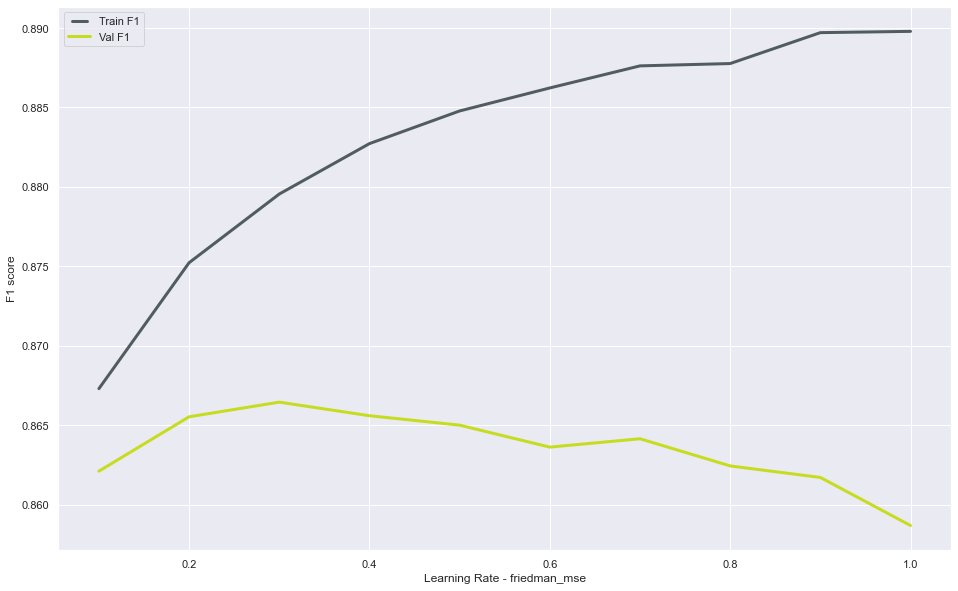

In [128]:
interval = list(np.linspace(0.1, 1, 10, endpoint = True))
X_train_ridge = X_train[ridge_variables]
y_train_ridge = y_train
train_results = []
val_results = []
for i in interval:
    ab = GradientBoostingClassifier(random_state = 5, learning_rate = i)
    score_train = []
    score_val = []
    for train_index, val_index in kfolds.split(X_train_ridge,y_train_ridge):
        X_train_, X_val_ = X_train_ridge.iloc[train_index], X_train_ridge.iloc[val_index]
        y_train_, y_val_ = y_train_ridge.iloc[train_index], y_train_ridge.iloc[val_index]
        ab.fit(X_train_, y_train_)
        y_pred_train = ab.predict(X_train_)
        y_pred_val = ab.predict(X_val_)
        value_train = f1_score(y_train_, y_pred_train, average = 'micro')
        value_val = f1_score(y_val_, y_pred_val, average = 'micro')
        score_train.append(value_train)
        score_val.append(value_val)
    train_results.append(np.mean(score_train))
    val_results.append(np.mean(score_val))
fig = plt.figure(figsize = (16,10))
line1, = plt.plot(interval, train_results, '#515C60', label = "Train F1", linewidth = 3)
line2, = plt.plot(interval, val_results, '#C7DC1F', label = "Val F1", linewidth = 3)
plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
plt.ylabel("F1 score")
plt.xlabel(str('Learning Rate - friedman_mse'))
plt.show()

#### N_estimators

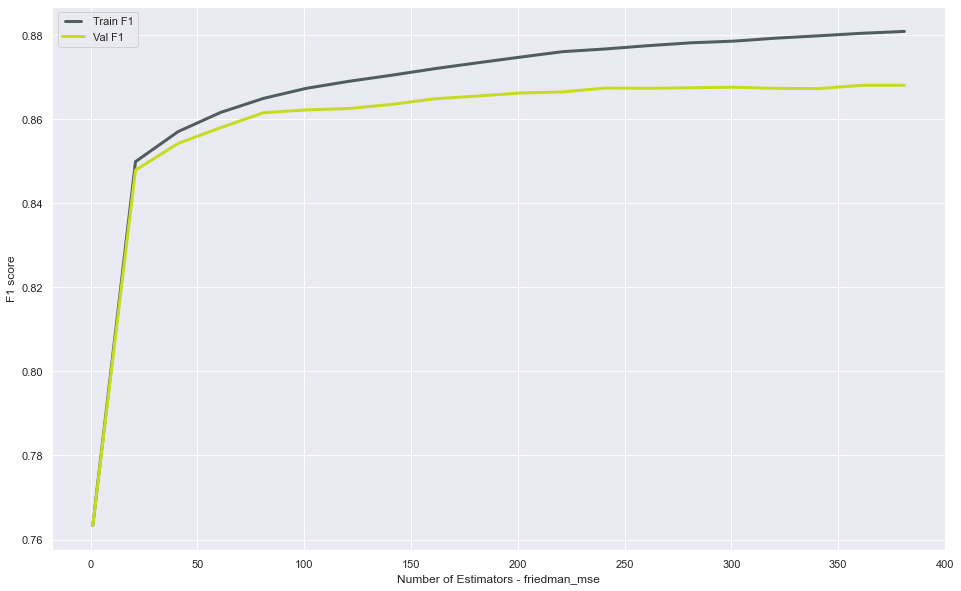

In [129]:
interval = list(range(1,400,20))
X_train_ridge = X_train[ridge_variables]
y_train_ridge = y_train
train_results = []
val_results = []
for i in interval:
    ab = GradientBoostingClassifier(random_state = 5, n_estimators = i)
    score_train = []
    score_val = []
    for train_index, val_index in kfolds.split(X_train_ridge,y_train_ridge):
        X_train_, X_val_ = X_train_ridge.iloc[train_index], X_train_ridge.iloc[val_index]
        y_train_, y_val_ = y_train_ridge.iloc[train_index], y_train_ridge.iloc[val_index]
        ab.fit(X_train_, y_train_)
        y_pred_train = ab.predict(X_train_)
        y_pred_val = ab.predict(X_val_)
        value_train = f1_score(y_train_, y_pred_train, average = 'micro')
        value_val = f1_score(y_val_, y_pred_val, average = 'micro')
        score_train.append(value_train)
        score_val.append(value_val)
    train_results.append(np.mean(score_train))
    val_results.append(np.mean(score_val))
fig = plt.figure(figsize = (16,10))
line1, = plt.plot(interval, train_results, '#515C60', label = "Train F1", linewidth = 3)
line2, = plt.plot(interval, val_results, '#C7DC1F', label = "Val F1", linewidth = 3)
plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
plt.ylabel("F1 score")
plt.xlabel(str('Number of Estimators - friedman_mse'))
plt.show()

#### Hyperparameters Tunning

In [130]:
gb = GradientBoostingClassifier(random_state = 5)

# Criterion
gb_mse = GradientBoostingClassifier(random_state = 5, criterion = 'mse')
gb_mae = GradientBoostingClassifier(random_state = 5, criterion = 'mae')

# Max_depth
gb_md1 = GradientBoostingClassifier(random_state = 5, max_depth = 2)
gb_md2 = GradientBoostingClassifier(random_state = 5, max_depth = 4)
gb_md3 = GradientBoostingClassifier(random_state = 5, max_depth = 5)
gb_md4 = GradientBoostingClassifier(random_state = 5, max_depth = 6)

# Min_samples_split
gb_mss1 = GradientBoostingClassifier(random_state = 5, min_samples_split = 10)
gb_mss2 = GradientBoostingClassifier(random_state = 5, min_samples_split = 50)
gb_mss3 = GradientBoostingClassifier(random_state = 5, min_samples_split = 100)

# Min_samples_leaf
gb_msl1 = GradientBoostingClassifier(random_state = 5, min_samples_leaf = 50)
gb_msl2 = GradientBoostingClassifier(random_state = 5, min_samples_leaf = 100)
gb_msl3 = GradientBoostingClassifier(random_state = 5, min_samples_leaf = 250)
gb_msl4 = GradientBoostingClassifier(random_state = 5, min_samples_leaf = 300)

# Min_weight_fraction_leaf
gb_mwfl1 = GradientBoostingClassifier(random_state = 5, min_weight_fraction_leaf = 0.005)
gb_mwfl2 = GradientBoostingClassifier(random_state = 5, min_weight_fraction_leaf = 0.02)
gb_mwfl3 = GradientBoostingClassifier(random_state = 5, min_weight_fraction_leaf = 0.1)

# Max_features 
gb_mf1 = GradientBoostingClassifier(random_state = 5, max_features = 'log2')
gb_mf2 = GradientBoostingClassifier(random_state = 5, max_features = 'auto')
gb_mf3 = GradientBoostingClassifier(random_state = 5, max_features = 10)

# Max_leaf_nodes
gb_mln1 = GradientBoostingClassifier(random_state = 5, max_leaf_nodes = 4)
gb_mln2 = GradientBoostingClassifier(random_state = 5, max_leaf_nodes = 5)
gb_mln3 = GradientBoostingClassifier(random_state = 5, max_leaf_nodes = 6)
gb_mln4 = GradientBoostingClassifier(random_state = 5, max_leaf_nodes = 7)

# Min_impurity_decrease
gb_mid1 = GradientBoostingClassifier(random_state = 5, min_impurity_decrease = 0.01)
gb_mid2 = GradientBoostingClassifier(random_state = 5, min_impurity_decrease = 0.02)
gb_mid3 = GradientBoostingClassifier(random_state = 5, min_impurity_decrease = 0.05)

# Learning_rate
gb_lr1 = GradientBoostingClassifier(random_state = 5, learning_rate = 0.1)
gb_lr2 = GradientBoostingClassifier(random_state = 5, learning_rate = 0.2)
gb_lr3 = GradientBoostingClassifier(random_state = 5, learning_rate = 0.3)
gb_lr4 = GradientBoostingClassifier(random_state = 5, learning_rate = 0.4)

# N_estimators
gb_ne1 = GradientBoostingClassifier(random_state = 5, n_estimators = 10)
gb_ne2 = GradientBoostingClassifier(random_state = 5, n_estimators = 100)
gb_ne3 = GradientBoostingClassifier(random_state = 5, n_estimators = 200)
gb_ne4 = GradientBoostingClassifier(random_state = 5, n_estimators = 300)

# Loss
gb_loss1 = GradientBoostingClassifier(random_state = 5,  loss = 'exponential')
gb_loss2 = GradientBoostingClassifier(random_state = 5,  loss = 'deviance')

df = pd.DataFrame(columns = ['Time','Train','Val'], index = ['Raw', 'Criterion = mse', 'Criterion = mae', 'Max_depth = 2',
                  'Max_depth = 4', 'Max_depth = 5', 'Max_depth = 6', 'Min_samples_split = 10', 'Min_samples_split = 50',
                  'Min_samples_split = 100', 'Min_samples_leaf = 50', 'Min_samples_leaf = 100', 'Min_samples_leaf = 250',
                  'Min_samples_leaf = 300', 'Min_weight_fraction_leaf = 0.005', 'Min_weight_fraction_leaf = 0.02',
                  'Min_weight_fraction_leaf = 0.1', 'Max_features = log2', 'Max_features = auto', 'Max_features = 10',
                  'Max_leaf_nodes = 4', 'Max_leaf_nodes = 5', 'Max_leaf_nodes = 6', 'Max_leaf_nodes = 7',
                  'Min_impurity_decrease = 0.01', 'Min_impurity_decrease = 0.02', 'Min_impurity_decrease = 0.05',
                  'Learning Rate = 0.1', 'Learning Rate = 0.2', 'Learning Rate = 0.3', 'Learning Rate = 0.4', 
                  'N_estimators = 10','N_estimators = 100', 'N_estimators = 200', 'N_estimators = 300', 'Loss = exponential',
                  'Loss = deviance'])
show_results(df,X_train[ridge_variables], y_train, kfolds, [gb, gb_mse, gb_mae, gb_md1, gb_md2, gb_md3, gb_md4, gb_mss1,
                                                            gb_mss2, gb_mss3, gb_msl1, gb_msl2, gb_msl3, gb_msl4, gb_mwfl1,
                                                            gb_mwfl2, gb_mwfl3, gb_mf1, gb_mf2, gb_mf3, gb_mln1, gb_mln2,
                                                            gb_mln3, gb_mln4, gb_mid1, gb_mid2, gb_mid3, gb_lr1, gb_lr2, gb_lr3,
                                                            gb_lr4, gb_ne1, gb_ne2, gb_ne3, gb_ne4, gb_loss1, gb_loss2])

,Time,Train,Val
Raw,0.848+/-0.0,0.868+/-0.0,0.853+/-0.0
Criterion = mse,0.863+/-0.0,0.868+/-0.0,0.853+/-0.0
Criterion = mae,350.804+/-0.0,0.825+/-0.0,0.809+/-0.0
Max_depth = 2,0.614+/-0.0,0.859+/-0.0,0.847+/-0.0
Max_depth = 4,1.108+/-0.0,0.875+/-0.0,0.853+/-0.0
Max_depth = 5,1.379+/-0.0,0.884+/-0.0,0.861+/-0.0
Max_depth = 6,1.679+/-0.0,0.892+/-0.0,0.857+/-0.0
Min_samples_split = 10,0.851+/-0.0,0.868+/-0.0,0.852+/-0.0
Min_samples_split = 50,0.854+/-0.0,0.867+/-0.0,0.85+/-0.0
Min_samples_split = 100,0.851+/-0.0,0.868+/-0.0,0.851+/-0.0


### - rfe_gb_variables

#### Learning_rate

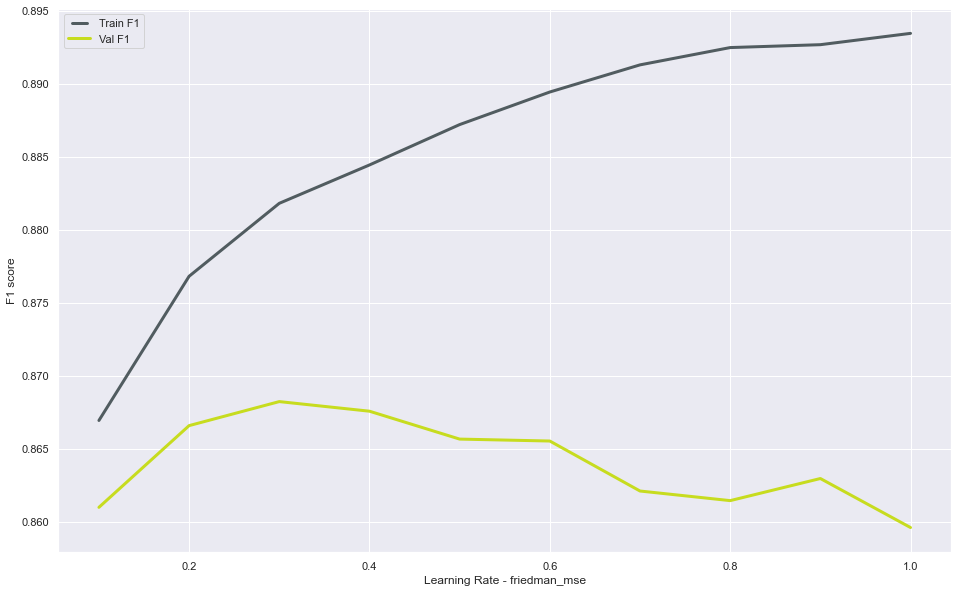

In [131]:
interval = list(np.linspace(0.1, 1, 10, endpoint = True))
X_train_rfe = X_train[rfe_gb_variables]
y_train_rfe = y_train
train_results = []
val_results = []
for i in interval:
    ab = GradientBoostingClassifier(random_state = 5, learning_rate = i)
    score_train = []
    score_val = []
    for train_index, val_index in kfolds.split(X_train_rfe,y_train_rfe):
        X_train_, X_val_ = X_train_rfe.iloc[train_index], X_train_rfe.iloc[val_index]
        y_train_, y_val_ = y_train_rfe.iloc[train_index], y_train_rfe.iloc[val_index]
        ab.fit(X_train_, y_train_)
        y_pred_train = ab.predict(X_train_)
        y_pred_val = ab.predict(X_val_)
        value_train = f1_score(y_train_, y_pred_train, average = 'micro')
        value_val = f1_score(y_val_, y_pred_val, average = 'micro')
        score_train.append(value_train)
        score_val.append(value_val)
    train_results.append(np.mean(score_train))
    val_results.append(np.mean(score_val))
fig = plt.figure(figsize = (16,10))
line1, = plt.plot(interval, train_results, '#515C60', label = "Train F1", linewidth = 3)
line2, = plt.plot(interval, val_results, '#C7DC1F', label = "Val F1", linewidth = 3)
plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
plt.ylabel("F1 score")
plt.xlabel(str('Learning Rate - friedman_mse'))
plt.show()

#### N_estimators

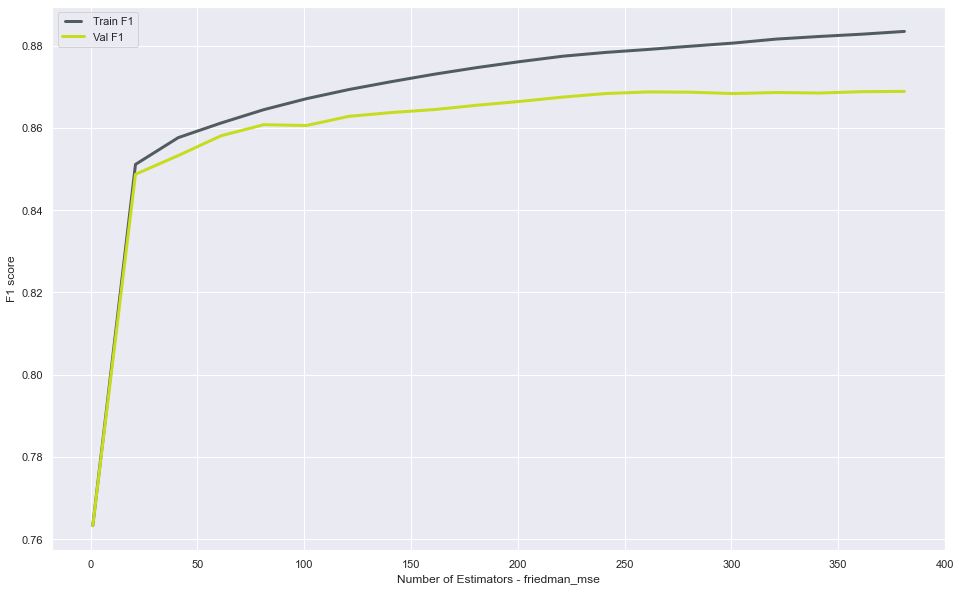

In [132]:
interval = list(range(1,400,20))
X_train_rfe = X_train[rfe_gb_variables]
y_train_rfe = y_train
train_results = []
val_results = []
for i in interval:
    ab = GradientBoostingClassifier(random_state = 5, n_estimators = i)
    score_train = []
    score_val = []
    for train_index, val_index in kfolds.split(X_train_rfe,y_train_rfe):
        X_train_, X_val_ = X_train_rfe.iloc[train_index], X_train_rfe.iloc[val_index]
        y_train_, y_val_ = y_train_rfe.iloc[train_index], y_train_rfe.iloc[val_index]
        ab.fit(X_train_, y_train_)
        y_pred_train = ab.predict(X_train_)
        y_pred_val = ab.predict(X_val_)
        value_train = f1_score(y_train_, y_pred_train, average = 'micro')
        value_val = f1_score(y_val_, y_pred_val, average = 'micro')
        score_train.append(value_train)
        score_val.append(value_val)
    train_results.append(np.mean(score_train))
    val_results.append(np.mean(score_val))
fig = plt.figure(figsize = (16,10))
line1, = plt.plot(interval, train_results, '#515C60', label = "Train F1", linewidth = 3)
line2, = plt.plot(interval, val_results, '#C7DC1F', label = "Val F1", linewidth = 3)
plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
plt.ylabel("F1 score")
plt.xlabel(str('Number of Estimators - friedman_mse'))
plt.show()

#### Hyperparameters Tunning

In [133]:
gb = GradientBoostingClassifier(random_state = 5)

# Criterion
gb_mse = GradientBoostingClassifier(random_state = 5, criterion = 'mse')
gb_mae = GradientBoostingClassifier(random_state = 5, criterion = 'mae')

# Max_depth
gb_md1 = GradientBoostingClassifier(random_state = 5, max_depth = 2)
gb_md2 = GradientBoostingClassifier(random_state = 5, max_depth = 4)
gb_md3 = GradientBoostingClassifier(random_state = 5, max_depth = 5)
gb_md4 = GradientBoostingClassifier(random_state = 5, max_depth = 6)

# Min_samples_split
gb_mss1 = GradientBoostingClassifier(random_state = 5, min_samples_split = 10)
gb_mss2 = GradientBoostingClassifier(random_state = 5, min_samples_split = 50)
gb_mss3 = GradientBoostingClassifier(random_state = 5, min_samples_split = 100)

# Min_samples_leaf
gb_msl1 = GradientBoostingClassifier(random_state = 5, min_samples_leaf = 50)
gb_msl2 = GradientBoostingClassifier(random_state = 5, min_samples_leaf = 100)
gb_msl3 = GradientBoostingClassifier(random_state = 5, min_samples_leaf = 250)
gb_msl4 = GradientBoostingClassifier(random_state = 5, min_samples_leaf = 300)

# Min_weight_fraction_leaf
gb_mwfl1 = GradientBoostingClassifier(random_state = 5, min_weight_fraction_leaf = 0.005)
gb_mwfl2 = GradientBoostingClassifier(random_state = 5, min_weight_fraction_leaf = 0.02)
gb_mwfl3 = GradientBoostingClassifier(random_state = 5, min_weight_fraction_leaf = 0.1)

# Max_features 
gb_mf1 = GradientBoostingClassifier(random_state = 5, max_features = 'log2')
gb_mf2 = GradientBoostingClassifier(random_state = 5, max_features = 'auto')
gb_mf3 = GradientBoostingClassifier(random_state = 5, max_features = 10)

# Max_leaf_nodes
gb_mln1 = GradientBoostingClassifier(random_state = 5, max_leaf_nodes = 4)
gb_mln2 = GradientBoostingClassifier(random_state = 5, max_leaf_nodes = 5)
gb_mln3 = GradientBoostingClassifier(random_state = 5, max_leaf_nodes = 6)
gb_mln4 = GradientBoostingClassifier(random_state = 5, max_leaf_nodes = 7)

# Min_impurity_decrease
gb_mid1 = GradientBoostingClassifier(random_state = 5, min_impurity_decrease = 0.01)
gb_mid2 = GradientBoostingClassifier(random_state = 5, min_impurity_decrease = 0.02)
gb_mid3 = GradientBoostingClassifier(random_state = 5, min_impurity_decrease = 0.05)

# Learning_rate
gb_lr1 = GradientBoostingClassifier(random_state = 5, learning_rate = 0.1)
gb_lr2 = GradientBoostingClassifier(random_state = 5, learning_rate = 0.2)
gb_lr3 = GradientBoostingClassifier(random_state = 5, learning_rate = 0.3)

# N_estimators
gb_ne1 = GradientBoostingClassifier(random_state = 5, n_estimators = 10)
gb_ne2 = GradientBoostingClassifier(random_state = 5, n_estimators = 100)
gb_ne3 = GradientBoostingClassifier(random_state = 5, n_estimators = 200)
gb_ne4 = GradientBoostingClassifier(random_state = 5, n_estimators = 250)

# Loss
gb_loss1 = GradientBoostingClassifier(random_state = 5,  loss = 'exponential')
gb_loss2 = GradientBoostingClassifier(random_state = 5,  loss = 'deviance')

df = pd.DataFrame(columns = ['Time','Train','Val'], index = ['Raw', 'Criterion = mse', 'Criterion = mae', 'Max_depth = 2',
                  'Max_depth = 4', 'Max_depth = 5', 'Max_depth = 6', 'Min_samples_split = 10', 'Min_samples_split = 50',
                  'Min_samples_split = 100', 'Min_samples_leaf = 50', 'Min_samples_leaf = 100', 'Min_samples_leaf = 250',
                  'Min_samples_leaf = 300', 'Min_weight_fraction_leaf = 0.005', 'Min_weight_fraction_leaf = 0.02',
                  'Min_weight_fraction_leaf = 0.1', 'Max_features = log2', 'Max_features = auto', 'Max_features = 10',
                  'Max_leaf_nodes = 4', 'Max_leaf_nodes = 5', 'Max_leaf_nodes = 6', 'Max_leaf_nodes = 7',
                  'Min_impurity_decrease = 0.01', 'Min_impurity_decrease = 0.02', 'Min_impurity_decrease = 0.05',
                  'Learning Rate = 0.1', 'Learning Rate = 0.2', 'Learning Rate = 0.3', 'N_estimators = 10',
                  'N_estimators = 100', 'N_estimators = 200', 'N_estimators = 250', 'Loss = exponential', 'Loss = deviance'])
show_results(df,X_train[rfe_gb_variables], y_train, kfolds, [gb, gb_mse, gb_mae, gb_md1, gb_md2, gb_md3, gb_md4, gb_mss1,
                                                            gb_mss2, gb_mss3, gb_msl1, gb_msl2, gb_msl3, gb_msl4, gb_mwfl1,
                                                            gb_mwfl2, gb_mwfl3, gb_mf1, gb_mf2, gb_mf3, gb_mln1, gb_mln2,
                                                            gb_mln3, gb_mln4, gb_mid1, gb_mid2, gb_mid3, gb_lr1, gb_lr2, gb_lr3,
                                                            gb_ne1, gb_ne2, gb_ne3, gb_ne4, gb_loss1, gb_loss2])

,Time,Train,Val
Raw,0.981+/-0.0,0.868+/-0.0,0.849+/-0.0
Criterion = mse,0.981+/-0.0,0.868+/-0.0,0.849+/-0.0
Criterion = mae,476.259+/-0.0,0.826+/-0.0,0.809+/-0.0
Max_depth = 2,0.693+/-0.0,0.86+/-0.0,0.847+/-0.0
Max_depth = 4,1.269+/-0.0,0.877+/-0.0,0.85+/-0.0
Max_depth = 5,1.579+/-0.0,0.885+/-0.0,0.862+/-0.0
Max_depth = 6,1.935+/-0.0,0.895+/-0.0,0.864+/-0.0
Min_samples_split = 10,0.984+/-0.0,0.868+/-0.0,0.849+/-0.0
Min_samples_split = 50,0.986+/-0.0,0.867+/-0.0,0.848+/-0.0
Min_samples_split = 100,0.998+/-0.0,0.868+/-0.0,0.849+/-0.0


### Randomized Search

In [134]:
parameters_space_gb = {
    'criterion': ['mse','mae','friedman_mse'],
    'max_depth': [2,3,4,5,6],
    'min_samples_split': [2,10,50,100],
    'min_samples_leaf': [1,50,100,250,300],
    'min_weight_fraction_leaf' : [0,0.005,0.02,0.1],
    'max_features': [None,'log2','auto',10],
    'max_leaf_nodes': [None,4,5,6,7],
    'min_impurity_decrease': [0,0.01,0.02,0.05],
    'learning_rate': [0.1, 0.2, 0.3, 0.4],
    'n_estimators': [10,100,200,300,600,700],
    'loss':['deviance','exponential'],
    'random_state' : [5]
}

#### - ridge_variables

In [135]:
rand_gb_ridge = RandomizedSearchCV(GradientBoostingClassifier(), parameters_space_gb, 
                                   scoring = 'f1_micro').fit(X_train[ridge_variables],y_train)

In [136]:
rand_gb_ridge.best_params_

{'random_state': 5,
 'n_estimators': 700,
 'min_weight_fraction_leaf': 0.005,
 'min_samples_split': 10,
 'min_samples_leaf': 50,
 'min_impurity_decrease': 0,
 'max_leaf_nodes': None,
 'max_features': 'log2',
 'max_depth': 3,
 'loss': 'deviance',
 'learning_rate': 0.3,
 'criterion': 'mse'}

In [137]:
rand_gb_ridge.best_score_

0.8647396225630335

In [138]:
best_model_gb_ridge = rand_gb_ridge.best_estimator_
y_pred_train = best_model_gb_ridge.predict(X_train[ridge_variables])
y_pred_test = best_model_gb_ridge.predict(X_test[ridge_variables])
value_train = f1_score(y_train, y_pred_train, average = 'micro')
value_test = f1_score(y_test, y_pred_test, average = 'micro')

In [139]:
value_train

0.8809320081616534

In [140]:
value_test

0.8633292383292384

#### - rfe_gb_variables

In [141]:
rand_gb_rfe = RandomizedSearchCV(GradientBoostingClassifier(), parameters_space_gb, 
                                 scoring = 'f1_micro').fit(X_train[rfe_gb_variables],y_train)

In [142]:
rand_gb_rfe.best_params_

{'random_state': 5,
 'n_estimators': 100,
 'min_weight_fraction_leaf': 0,
 'min_samples_split': 10,
 'min_samples_leaf': 50,
 'min_impurity_decrease': 0.01,
 'max_leaf_nodes': None,
 'max_features': None,
 'max_depth': 4,
 'loss': 'deviance',
 'learning_rate': 0.4,
 'criterion': 'friedman_mse'}

In [143]:
rand_gb_rfe.best_score_

0.866385398855909

In [144]:
best_model_gb_rfe = rand_gb_rfe.best_estimator_
y_pred_train = best_model_gb_rfe.predict(X_train[rfe_gb_variables])
y_pred_test = best_model_gb_rfe.predict(X_test[rfe_gb_variables])
value_train = f1_score(y_train, y_pred_train, average = 'micro')
value_test = f1_score(y_test, y_pred_test, average = 'micro')

In [145]:
value_train

0.8845520963601659

In [146]:
value_test

0.8674754299754299

#### The model with the best score was the one with the rfe_gb_variables, so we will try to improve it and reduce the overfitting.

In [147]:
parameters_space_gb_1 = {
    'criterion': ['friedman_mse'],
    'max_depth': [4,5],
    'min_samples_split': [150,160,170],
    'min_samples_leaf': [50,60,70],
    'min_weight_fraction_leaf' : [0],
    'max_features': [None],
    'max_leaf_nodes': [None],
    'min_impurity_decrease': [0.01],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [200,250,300],
    'loss':['deviance'],
    'random_state' : [5]
}

In [148]:
grid_gb_rfe = GridSearchCV(GradientBoostingClassifier(), parameters_space_gb_1, 
                                 scoring = 'f1_micro').fit(X_train[rfe_gb_variables],y_train)

In [149]:
grid_gb_rfe.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.01,
 'min_samples_leaf': 60,
 'min_samples_split': 170,
 'min_weight_fraction_leaf': 0,
 'n_estimators': 250,
 'random_state': 5}

In [150]:
grid_gb_rfe.best_score_

0.868491744690106

In [151]:
best_model_gb_rfe_1 = grid_gb_rfe.best_estimator_
y_pred_train = best_model_gb_rfe_1.predict(X_train[rfe_gb_variables])
y_pred_test = best_model_gb_rfe_1.predict(X_test[rfe_gb_variables])
value_train = f1_score(y_train, y_pred_train, average = 'micro')
value_test = f1_score(y_test, y_pred_test, average = 'micro')

In [152]:
value_train

0.8811952873033634

In [153]:
value_test

0.8685503685503686

## XGBoost Hyperparameters Tunning

### - ridge_variables

In [154]:
xgb_ = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0)

# N_estimators
xgb_ne1 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, n_estimators = 10)
xgb_ne2 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, n_estimators = 100)
xgb_ne3 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, n_estimators = 200)
xgb_ne4 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, n_estimators = 500)

# Max_depth
xgb_md1 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, max_depth = 3)
xgb_md2 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, max_depth = 4)
xgb_md3 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, max_depth = 5)

# Learning_rate
xgb_lr1 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, learning_rate = 0.1)
xgb_lr2 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, learning_rate = 0.2)
xgb_lr3 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, learning_rate = 0.3)

# Colsample_bytree
xgb_cb1 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, colsample_bytree = 0.1)
xgb_cb2 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, colsample_bytree = 0.5)
xgb_cb3 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, colsample_bytree = 0.7)
xgb_cb4 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, colsample_bytree = 0.9)

# Subsample
xgb_ss1 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, subsample = 0.1)
xgb_ss2 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, subsample = 0.5)
xgb_ss3 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, subsample = 0.7)
xgb_ss4 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, subsample = 0.9)

# Gamma
xgb_ga1 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, gamma = 3)
xgb_ga2 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, gamma = 5)
xgb_ga3 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, gamma = 10)
xgb_ga4 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, gamma = 15)

# Min_child_weight
xgb_mcw1 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, min_child_weight = 1)
xgb_mcw2 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, min_child_weight = 3)
xgb_mcw3 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, min_child_weight = 5)
xgb_mcw4 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, min_child_weight = 10)

# Eta
xgb_eta1 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, eta = 0.05)
xgb_eta2 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, eta = 0.07)
xgb_eta3 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, eta = 0.1)
xgb_eta4 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, eta = 0.2)


df = pd.DataFrame(columns = ['Time','Train','Val'], index = ['Raw', 'N_estimators = 10', 'N_estimators = 100', 
                 'N_estimators = 200', 'N_estimators = 500', 'Max_depth = 3', 'Max_depth = 4', 
                 'Max_depth = 5', 'Learning Rate = 0.1', 'Learning Rate = 0.2', 'Learning Rate = 0.3',
                 'Colsample_bytree = 0.1', 'Colsample_bytree = 0.5', 'Colsample_bytree = 0.7', 'Colsample_bytree = 0.9', 
                 'Subsample = 0.1', 'Subsample = 0.5', 'Subsample = 0.7', 'Subsample = 0.9', 'Gamma = 3', 'Gamma = 5', 
                 'Gamma = 10', 'Gamma = 15', 'Min_child_weight = 1', 'Min_child_weight = 3', 'Min_child_weight = 5', 
                 'Min_child_weight = 10', 'Eta = 0.05', 'Eta = 0.07', 'Eta = 0.1', 'Eta = 0.2'])
show_results(df,X_train[ridge_variables], y_train, kfolds, [xgb_, xgb_ne1, xgb_ne2, xgb_ne3, xgb_ne4, xgb_md1, 
                                                            xgb_md2, xgb_md3, xgb_lr1, xgb_lr2, xgb_lr3, xgb_cb1, xgb_cb2, 
                                                            xgb_cb3, xgb_cb4, xgb_ss1, xgb_ss2, xgb_ss3, xgb_ss4, xgb_ga1, 
                                                            xgb_ga2, xgb_ga3, xgb_ga4, xgb_mcw1, xgb_mcw2, xgb_mcw3, 
                                                            xgb_mcw4, xgb_eta1, xgb_eta2, xgb_eta3, xgb_eta4])

,Time,Train,Val
Raw,0.394+/-0.0,0.899+/-0.0,0.859+/-0.0
N_estimators = 10,0.057+/-0.0,0.866+/-0.0,0.853+/-0.0
N_estimators = 100,0.359+/-0.0,0.899+/-0.0,0.859+/-0.0
N_estimators = 200,0.652+/-0.0,0.909+/-0.0,0.859+/-0.0
N_estimators = 500,1.504+/-0.0,0.93+/-0.0,0.842+/-0.0
Max_depth = 3,0.188+/-0.0,0.876+/-0.0,0.853+/-0.0
Max_depth = 4,0.25+/-0.0,0.884+/-0.0,0.857+/-0.0
Max_depth = 5,0.277+/-0.0,0.889+/-0.0,0.851+/-0.0
Learning Rate = 0.1,0.352+/-0.0,0.882+/-0.0,0.861+/-0.0
Learning Rate = 0.2,0.375+/-0.0,0.892+/-0.0,0.853+/-0.0


### - rfe_xgb_variables

In [155]:
xgb_ = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0)

# N_estimators
xgb_ne1 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, n_estimators = 10)
xgb_ne2 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, n_estimators = 100)
xgb_ne3 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, n_estimators = 200)
xgb_ne4 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, n_estimators = 500)

# Max_depth
xgb_md1 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, max_depth = 3)
xgb_md2 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, max_depth = 4)
xgb_md3 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, max_depth = 5)

# Learning_rate
xgb_lr1 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, learning_rate = 0.1)
xgb_lr2 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, learning_rate = 0.2)
xgb_lr3 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, learning_rate = 0.3)

# Colsample_bytree
xgb_cb1 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, colsample_bytree = 0.1)
xgb_cb2 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, colsample_bytree = 0.5)
xgb_cb3 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, colsample_bytree = 0.7)
xgb_cb4 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, colsample_bytree = 0.9)

# Subsample
xgb_ss1 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, subsample = 0.1)
xgb_ss2 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, subsample = 0.5)
xgb_ss3 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, subsample = 0.7)
xgb_ss4 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, subsample = 0.9)

# Gamma
xgb_ga1 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, gamma = 3)
xgb_ga2 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, gamma = 5)
xgb_ga3 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, gamma = 10)
xgb_ga4 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, gamma = 15)

# Min_child_weight
xgb_mcw1 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, min_child_weight = 1)
xgb_mcw2 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, min_child_weight = 3)
xgb_mcw3 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, min_child_weight = 5)
xgb_mcw4 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, min_child_weight = 10)

# Eta
xgb_eta1 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, eta = 0.05)
xgb_eta2 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, eta = 0.07)
xgb_eta3 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, eta = 0.1)
xgb_eta4 = xgb.XGBClassifier(n_jobs = -1, random_state = 5, verbosity = 0, eta = 0.2)


df = pd.DataFrame(columns = ['Time','Train','Val'], index = ['Raw', 'N_estimators = 10', 'N_estimators = 100', 
                 'N_estimators = 200', 'N_estimators = 500', 'Max_depth = 3', 'Max_depth = 4', 
                 'Max_depth = 5', 'Learning Rate = 0.1', 'Learning Rate = 0.2', 'Learning Rate = 0.3',
                 'Colsample_bytree = 0.1', 'Colsample_bytree = 0.5', 'Colsample_bytree = 0.7', 'Colsample_bytree = 0.9', 
                 'Subsample = 0.1', 'Subsample = 0.5', 'Subsample = 0.7', 'Subsample = 0.9', 'Gamma = 3', 'Gamma = 5', 
                 'Gamma = 10', 'Gamma = 15', 'Min_child_weight = 1', 'Min_child_weight = 3', 'Min_child_weight = 5', 
                 'Min_child_weight = 10', 'Eta = 0.05', 'Eta = 0.07', 'Eta = 0.1', 'Eta = 0.2'])
show_results(df,X_train[rfe_xgb_variables], y_train, kfolds, [xgb_, xgb_ne1, xgb_ne2, xgb_ne3, xgb_ne4, xgb_md1, 
                                                            xgb_md2, xgb_md3, xgb_lr1, xgb_lr2, xgb_lr3, xgb_cb1, xgb_cb2, 
                                                            xgb_cb3, xgb_cb4, xgb_ss1, xgb_ss2, xgb_ss3, xgb_ss4, xgb_ga1, 
                                                            xgb_ga2, xgb_ga3, xgb_ga4, xgb_mcw1, xgb_mcw2, xgb_mcw3, 
                                                            xgb_mcw4, xgb_eta1, xgb_eta2, xgb_eta3, xgb_eta4])

,Time,Train,Val
Raw,0.484+/-0.0,0.905+/-0.0,0.855+/-0.0
N_estimators = 10,0.078+/-0.0,0.867+/-0.0,0.846+/-0.0
N_estimators = 100,0.568+/-0.0,0.905+/-0.0,0.855+/-0.0
N_estimators = 200,0.944+/-0.0,0.922+/-0.0,0.845+/-0.0
N_estimators = 500,2.091+/-0.0,0.948+/-0.0,0.837+/-0.0
Max_depth = 3,0.277+/-0.0,0.88+/-0.0,0.857+/-0.0
Max_depth = 4,0.335+/-0.0,0.888+/-0.0,0.857+/-0.0
Max_depth = 5,0.394+/-0.0,0.895+/-0.0,0.856+/-0.0
Learning Rate = 0.1,0.523+/-0.0,0.883+/-0.0,0.856+/-0.0
Learning Rate = 0.2,0.487+/-0.0,0.895+/-0.0,0.859+/-0.0


### Randomized Search

In [182]:
parameters_space_xgb = {
    'verbosity': [0],
    'n_estimators': [10,100,200],
    'max_depth': [3,4,5],
    'learning_rate': [0.1,0.2,0.3],
    'colsample_bytree': [0.1,0.5,0.7,0.9,1],
    'subsample': [0.1,0.5,0.7,0.9,1],
    'gamma': [0,3,5,10],
    'min_child_weight': [0,1,3,5,10],
    'eta': [0.05,0.07,0.1,0.2],
    'random_state' : [5]  
}

#### - ridge_variables

In [183]:
rand_xgb_ridge = RandomizedSearchCV(xgb.XGBClassifier(), parameters_space_xgb, 
                                   scoring = 'f1_micro', n_iter = 1000).fit(X_train[ridge_variables],y_train)

In [184]:
rand_xgb_ridge.best_params_

{'verbosity': 0,
 'subsample': 1,
 'random_state': 5,
 'n_estimators': 200,
 'min_child_weight': 1,
 'max_depth': 4,
 'learning_rate': 0.3,
 'gamma': 3,
 'eta': 0.05,
 'colsample_bytree': 0.5}

In [185]:
rand_xgb_ridge.best_score_

0.8679646274967012

In [186]:
best_model_xgb_ridge = rand_xgb_ridge.best_estimator_
y_pred_train = best_model_xgb_ridge.predict(X_train[ridge_variables])
y_pred_test = best_model_xgb_ridge.predict(X_test[ridge_variables])
value_train = f1_score(y_train, y_pred_train, average = 'micro')
value_test = f1_score(y_test, y_pred_test, average = 'micro')

In [187]:
value_train

0.8753373264003159

In [188]:
value_test

0.863943488943489

#### - rfe_xgb_variables

In [189]:
rand_xgb_rfe = RandomizedSearchCV(xgb.XGBClassifier(), parameters_space_xgb, 
                                   scoring = 'f1_micro', n_iter = 1000).fit(X_train[rfe_xgb_variables],y_train)

In [190]:
rand_xgb_rfe.best_params_

{'verbosity': 0,
 'subsample': 0.5,
 'random_state': 5,
 'n_estimators': 100,
 'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.2,
 'gamma': 3,
 'eta': 0.07,
 'colsample_bytree': 0.7}

In [191]:
rand_xgb_rfe.best_score_

0.8703341961565698

In [192]:
best_model_xgb_rfe = rand_xgb_rfe.best_estimator_
y_pred_train = best_model_xgb_rfe.predict(X_train[rfe_xgb_variables])
y_pred_test = best_model_xgb_rfe.predict(X_test[rfe_xgb_variables])
value_train = f1_score(y_train, y_pred_train, average = 'micro')
value_test = f1_score(y_test, y_pred_test, average = 'micro')

In [193]:
value_train

0.8820509445139209

In [194]:
value_test

0.8667076167076169

## Stacking Classifier

In [239]:
best_model_gb_rfe_1_stack = GradientBoostingClassifier(criterion = 'friedman_mse', learning_rate = 0.1, loss = 'deviance',
                            max_depth = 5, max_features = None, max_leaf_nodes = None, min_impurity_decrease = 0.01, 
                            min_samples_leaf = 60, min_samples_split = 170, min_weight_fraction_leaf = 0, n_estimators = 250, 
                            random_state = 5)
best_model_xgb_rfe_stack = xgb.XGBClassifier(verbosity = 0, subsample = 0.5, random_state = 5, n_estimators = 100,
                           min_child_weight = 1, max_depth = 5, learning_rate = 0.2, gamma = 3, eta = 0.07, 
                           colsample_bytree = 0.7)

estimators = [('gb', best_model_gb_rfe_1_stack), ('xgb', best_model_xgb_rfe_stack)]
best_model_sc_xgb = StackingClassifier(estimators = estimators, 
                        final_estimator = LogisticRegression()).fit(X_train[rfe_xgb_variables], y_train)

In [240]:
y_pred_train = best_model_sc_xgb.predict(X_train[rfe_xgb_variables])
y_pred_test = best_model_sc_xgb.predict(X_test[rfe_xgb_variables])
value_train = f1_score(y_train, y_pred_train, average = 'micro')
value_test = f1_score(y_test, y_pred_test, average = 'micro')

In [241]:
value_train

0.8842888172184558

In [242]:
value_test

0.8680896805896806

# Final Predictions

## Importing the test dataset 

In [243]:
test = pd.read_excel('Test.xlsx', na_values = "?")

## Preprocessing the test dataset 

In [244]:
test.set_index('CITIZEN_ID', inplace = True)

test['Birthday'] = test['Birthday'].apply(to_datetime)

test.insert(2,'Age', test['Birthday'].map(lambda date : 2048 - date.year))
test.insert(1, 'Gender', test['Name'].map(lambda name : 0 if name.split()[0] == 'Mr.' else 1))

test['Base Area'] = test['Base Area'].map(lambda region: region if region == 'Northbury' else 'Other Base Area')
test['Marital Status'] = test['Marital Status'].map(lambda status: 'Married' 
                                    if(status =='Married - Spouse Missing' or status == 'Married - Spouse in the Army')
                                    else('Divorced' if status == 'Separated' else status))

education = test.loc[:,['Education Level']]
education_status = OrdinalEncoder( categories = [['Preschool','Primary School','Middle School - 1st Cycle',
                                               'Middle School - 2nd Cycle', 'Middle School Complete','High School - 1st Cycle',
                                               'High School - 2nd Cycle', 'High School Complete','Professional School',
                                               'High School + PostGraduation', 'Professional School + PostGraduation',
                                               'Bachelors','Bachelors + PostGraduation', 'Masters','Masters + PostGraduation',
                                               'PhD']])
test['Education Level'] = education_status.fit_transform(education)


test.drop(columns = ['Name','Birthday'], inplace = True)

test = test.fillna(X_test.mode().loc[0])

columns = ['Native Continent', 'Lives with', 'Base Area', 'Employment Sector', 'Role', 'Marital Status']
for column in columns:
    test = pd.concat([test, pd.get_dummies(test[str(column)])], axis = 1).drop(str(column),axis = 1)

if len(X_train.columns) + 2 > len(test.columns):
    missing_cols = set(X_train.columns) - set(test.columns)
    for missing in missing_cols:
        test[str(missing)] = 0    
    
test_scaler_feat = scaler.transform(test)
test[test.columns] = test_scaler_feat

test.drop(columns = ['Education Level', 'Other Base Area'],inplace = True)

## Generate the output file

### Gradient Boosting Models

#### - rfe_gb_variables

In [198]:
pred_test_gb_rfe_1 = best_model_gb_rfe_1.predict(test[rfe_gb_variables])
final_results_gb_rfe_1 = {'CITIZEN_ID': test.index, 'Income': pred_test_gb_rfe_1}
final_results_gb_rfe_1 = pd.DataFrame(final_results_gb_rfe_1)
final_results_gb_rfe_1.to_csv('Grupo02_Version33.csv', index = False)

Kaggle score: 0.86534

### XGBoost Model

#### - rfe_xgb_variables

In [199]:
pred_test_xgb_rfe = best_model_xgb_rfe.predict(test[rfe_xgb_variables])
final_results_xgb_rfe = {'CITIZEN_ID': test.index, 'Income': pred_test_xgb_rfe}
final_results_xgb_rfe = pd.DataFrame(final_results_xgb_rfe)
final_results_xgb_rfe.to_csv('Grupo02_Version34.csv', index = False)

Kaggle score: 0.86831

### Stacking Classifier Model 
#### Gradient Boosting Models (rfe_gb_variables) and XGBoost Model (rfe_xgb_variables)

In [245]:
pred_test_sc_xgb = best_model_sc_xgb.predict(test[rfe_xgb_variables])
final_results_sc_xgb = {'CITIZEN_ID': test.index, 'Income': pred_test_sc_xgb}
final_results_sc_xgb = pd.DataFrame(final_results_sc_xgb)
final_results_sc_xgb.to_csv('Grupo02_Version35.csv', index = False)

Kaggle score: 0.86897